<a href="https://colab.research.google.com/github/angiegh2002/DM-ML/blob/main/DM%26ML%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#import library

In [2]:
!pip install missingno

In [108]:
pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 17.8 MB/s eta 0:00:00


In [116]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import math
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    average_precision_score,
    precision_recall_curve
)
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

#louding data

In [55]:
df=pd.read_csv('/content/drive/MyDrive/DM&ML/Loan_Default.csv')

In [56]:
df.head()

ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ...   
4           p1                l1        nopc                  nob/c  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0          EXP           758                       CIB  25-34   
1         EQUI           552                       EXP  55-64   
2          EXP           834                       CIB  35-44   
3          EXP           587                       CIB  45-54   
4         CRIF           602                       EXP  25-34   

   submission_of_application        LTV Region Security_Type  Status dtir1  
0                    to_inst  98.728814  south        direct       1  45.0  
1                    to_inst        NaN  North        direct       1   NaN  
2                    to_inst  80.019685  south        direct       0  46.0  
3                   not_inst  69.376900  North        direct       0  42.0  
4                   not_inst  91.886544  North        direct       0  39.0  

[5 rows x 34 columns]

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

#EDA

##Statistical Summary

In [ ]:
df.describe()

ID      year   loan_amount  rate_of_interest  \
count  148670.000000  148670.0  1.486700e+05     112231.000000   
mean    99224.500000    2019.0  3.311177e+05          4.045476   
std     42917.476598       0.0  1.839093e+05          0.561391   
min     24890.000000    2019.0  1.650000e+04          0.000000   
25%     62057.250000    2019.0  1.965000e+05          3.625000   
50%     99224.500000    2019.0  2.965000e+05          3.990000   
75%    136391.750000    2019.0  4.365000e+05          4.375000   
max    173559.000000    2019.0  3.576500e+06          8.000000   

       Interest_rate_spread  Upfront_charges           term  property_value  \
count         112031.000000    109028.000000  148629.000000    1.335720e+05   
mean               0.441656      3224.996127     335.136582    4.978935e+05   
std                0.513043      3251.121510      58.409084    3.599353e+05   
min               -3.638000         0.000000      96.000000    8.000000e+03   
25%                0.076000       581.490000     360.000000    2.680000e+05   
50%                0.390400      2596.450000     360.000000    4.180000e+05   
75%                0.775400      4812.500000     360.000000    6.280000e+05   
max                3.357000     60000.000000     360.000000    1.650800e+07   

              income   Credit_Score            LTV         Status  \
count  139520.000000  148670.000000  133572.000000  148670.000000   
mean     6957.338876     699.789103      72.746457       0.246445   
std      6496.586382     115.875857      39.967603       0.430942   
min         0.000000     500.000000       0.967478       0.000000   
25%      3720.000000     599.000000      60.474860       0.000000   
50%      5760.000000     699.000000      75.135870       0.000000   
75%      8520.000000     800.000000      86.184211       0.000000   
max    578580.000000     900.000000    7831.250000       1.000000   

               dtir1  
count  124549.000000  
mean       37.732932  
std        10.545435  
min         5.000000  
25%        31.000000  
50%        39.000000  
75%        45.000000  
max        61.000000

<div dir="rtl">

- جميع المتغيرات العددية يوجد فيها outlayer باستثناء rate_of_interest,	Interest_rate_spread,Credit_Score تحتاج الى فخص بصري للتاكد
- ايضا متغير الهدف Status يوجد عدم توازن بالقيم
</div>

In [ ]:
missing_percent= df.isnull().mean().sort_values(ascending=False)*100
missing_percent[missing_percent > 0]

Upfront_charges              26.664425
Interest_rate_spread         24.644515
rate_of_interest             24.509989
dtir1                        16.224524
LTV                          10.155378
property_value               10.155378
income                        6.154571
loan_limit                    2.249277
approv_in_adv                 0.610749
submission_of_application     0.134526
age                           0.134526
loan_purpose                  0.090133
Neg_ammortization             0.081388
term                          0.027578
dtype: float64

In [ ]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

Upfront_charges              39642
Interest_rate_spread         36639
rate_of_interest             36439
dtir1                        24121
LTV                          15098
property_value               15098
income                        9150
loan_limit                    3344
approv_in_adv                  908
submission_of_application      200
age                            200
loan_purpose                   134
Neg_ammortization              121
term                            41
dtype: int64

In [ ]:
print(df.nunique())

ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score                    401
co-applicant_credit_type          2
age                         

In [ ]:
print(df.duplicated().sum())

0


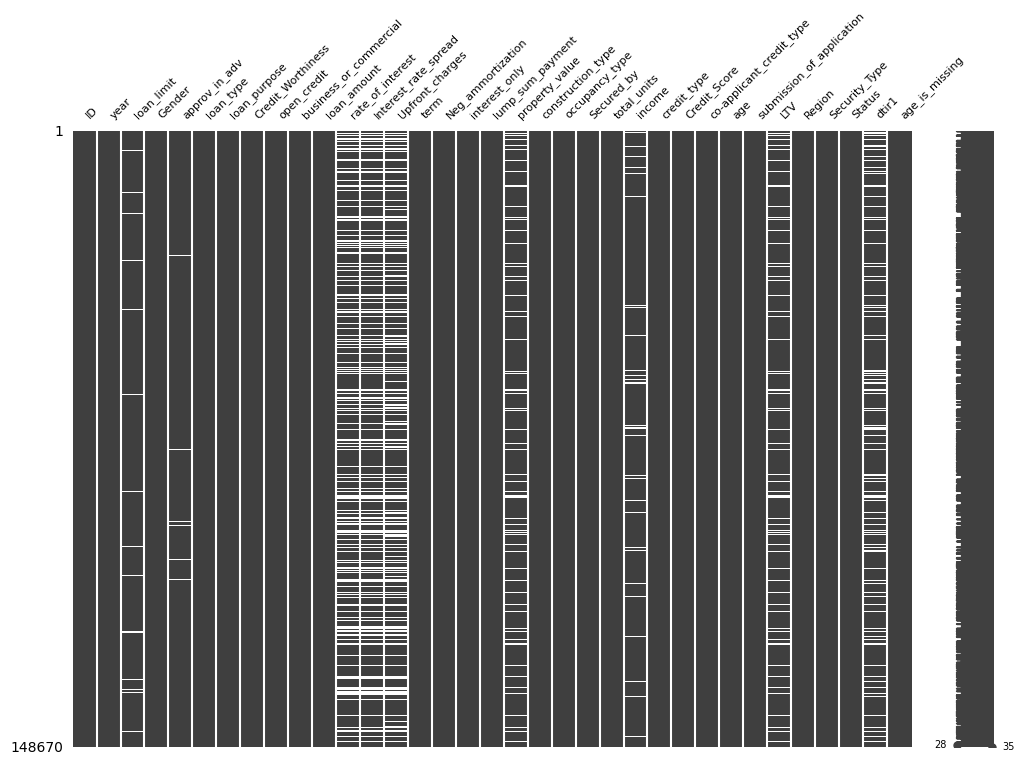

In [ ]:
msno.matrix(df, figsize=(12, 8),fontsize=8)
plt.show()

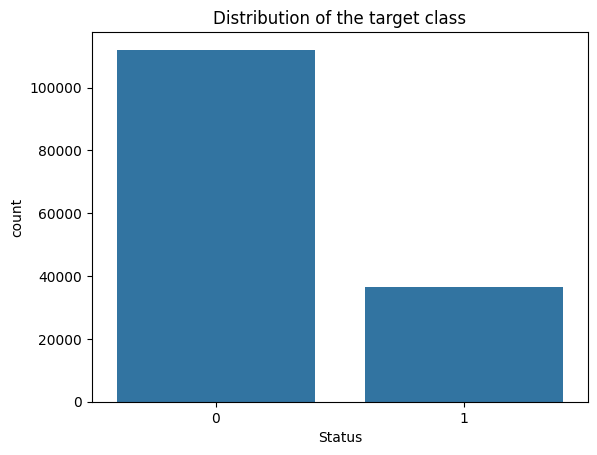

Status
0    75.355485
1    24.644515
Name: proportion, dtype: float64

In [ ]:
sns.countplot(x='Status', data=df)
plt.title("Distribution of the target class")
plt.show()
df['Status'].value_counts(normalize=True) * 100

- يوجد عدم نوازن في المتغير الهدف

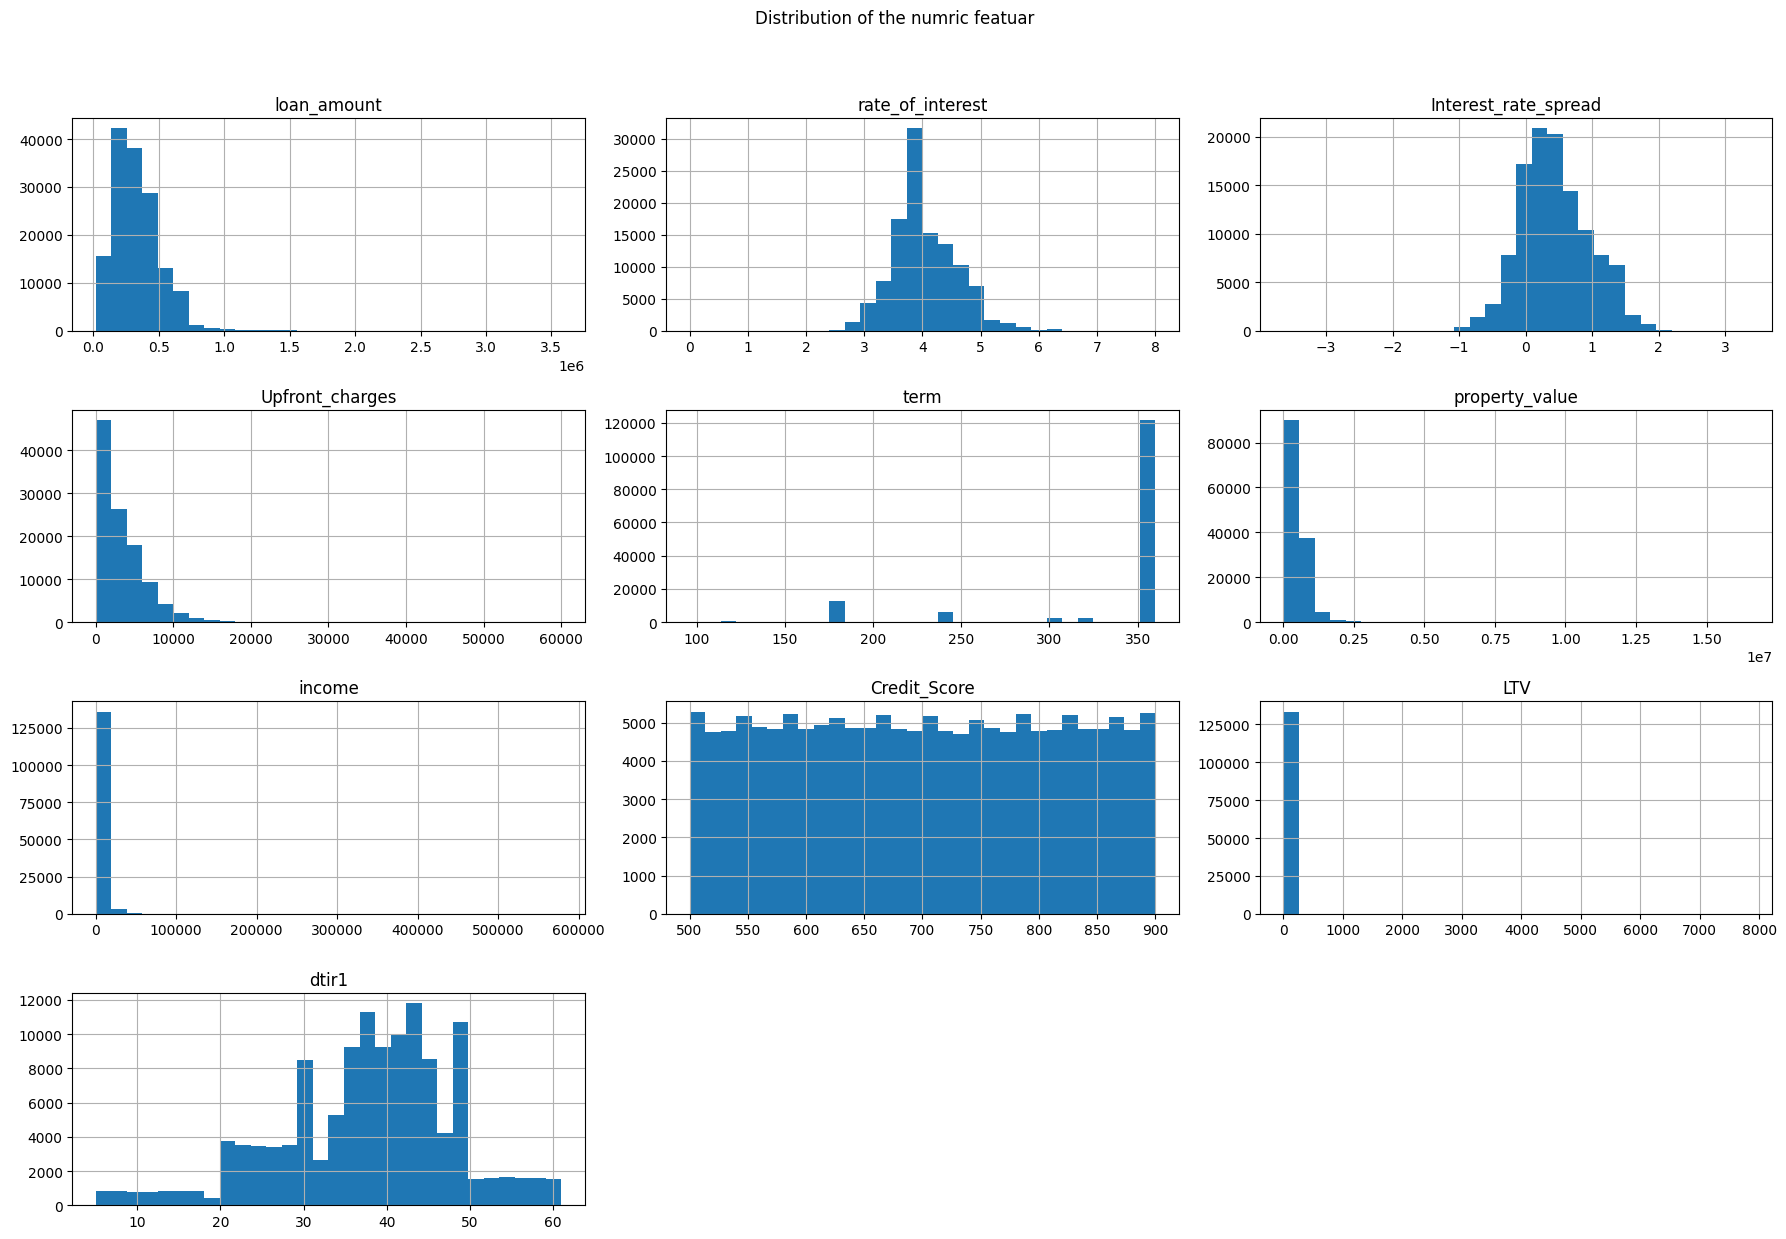

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
cols_to_exclude = ['ID', 'year', 'Status']
plot_cols = [col for col in numeric_cols if col not in cols_to_exclude]
df[plot_cols].hist(bins=30, figsize=(18, 13))
plt.suptitle("Distribution of the numric featuar")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

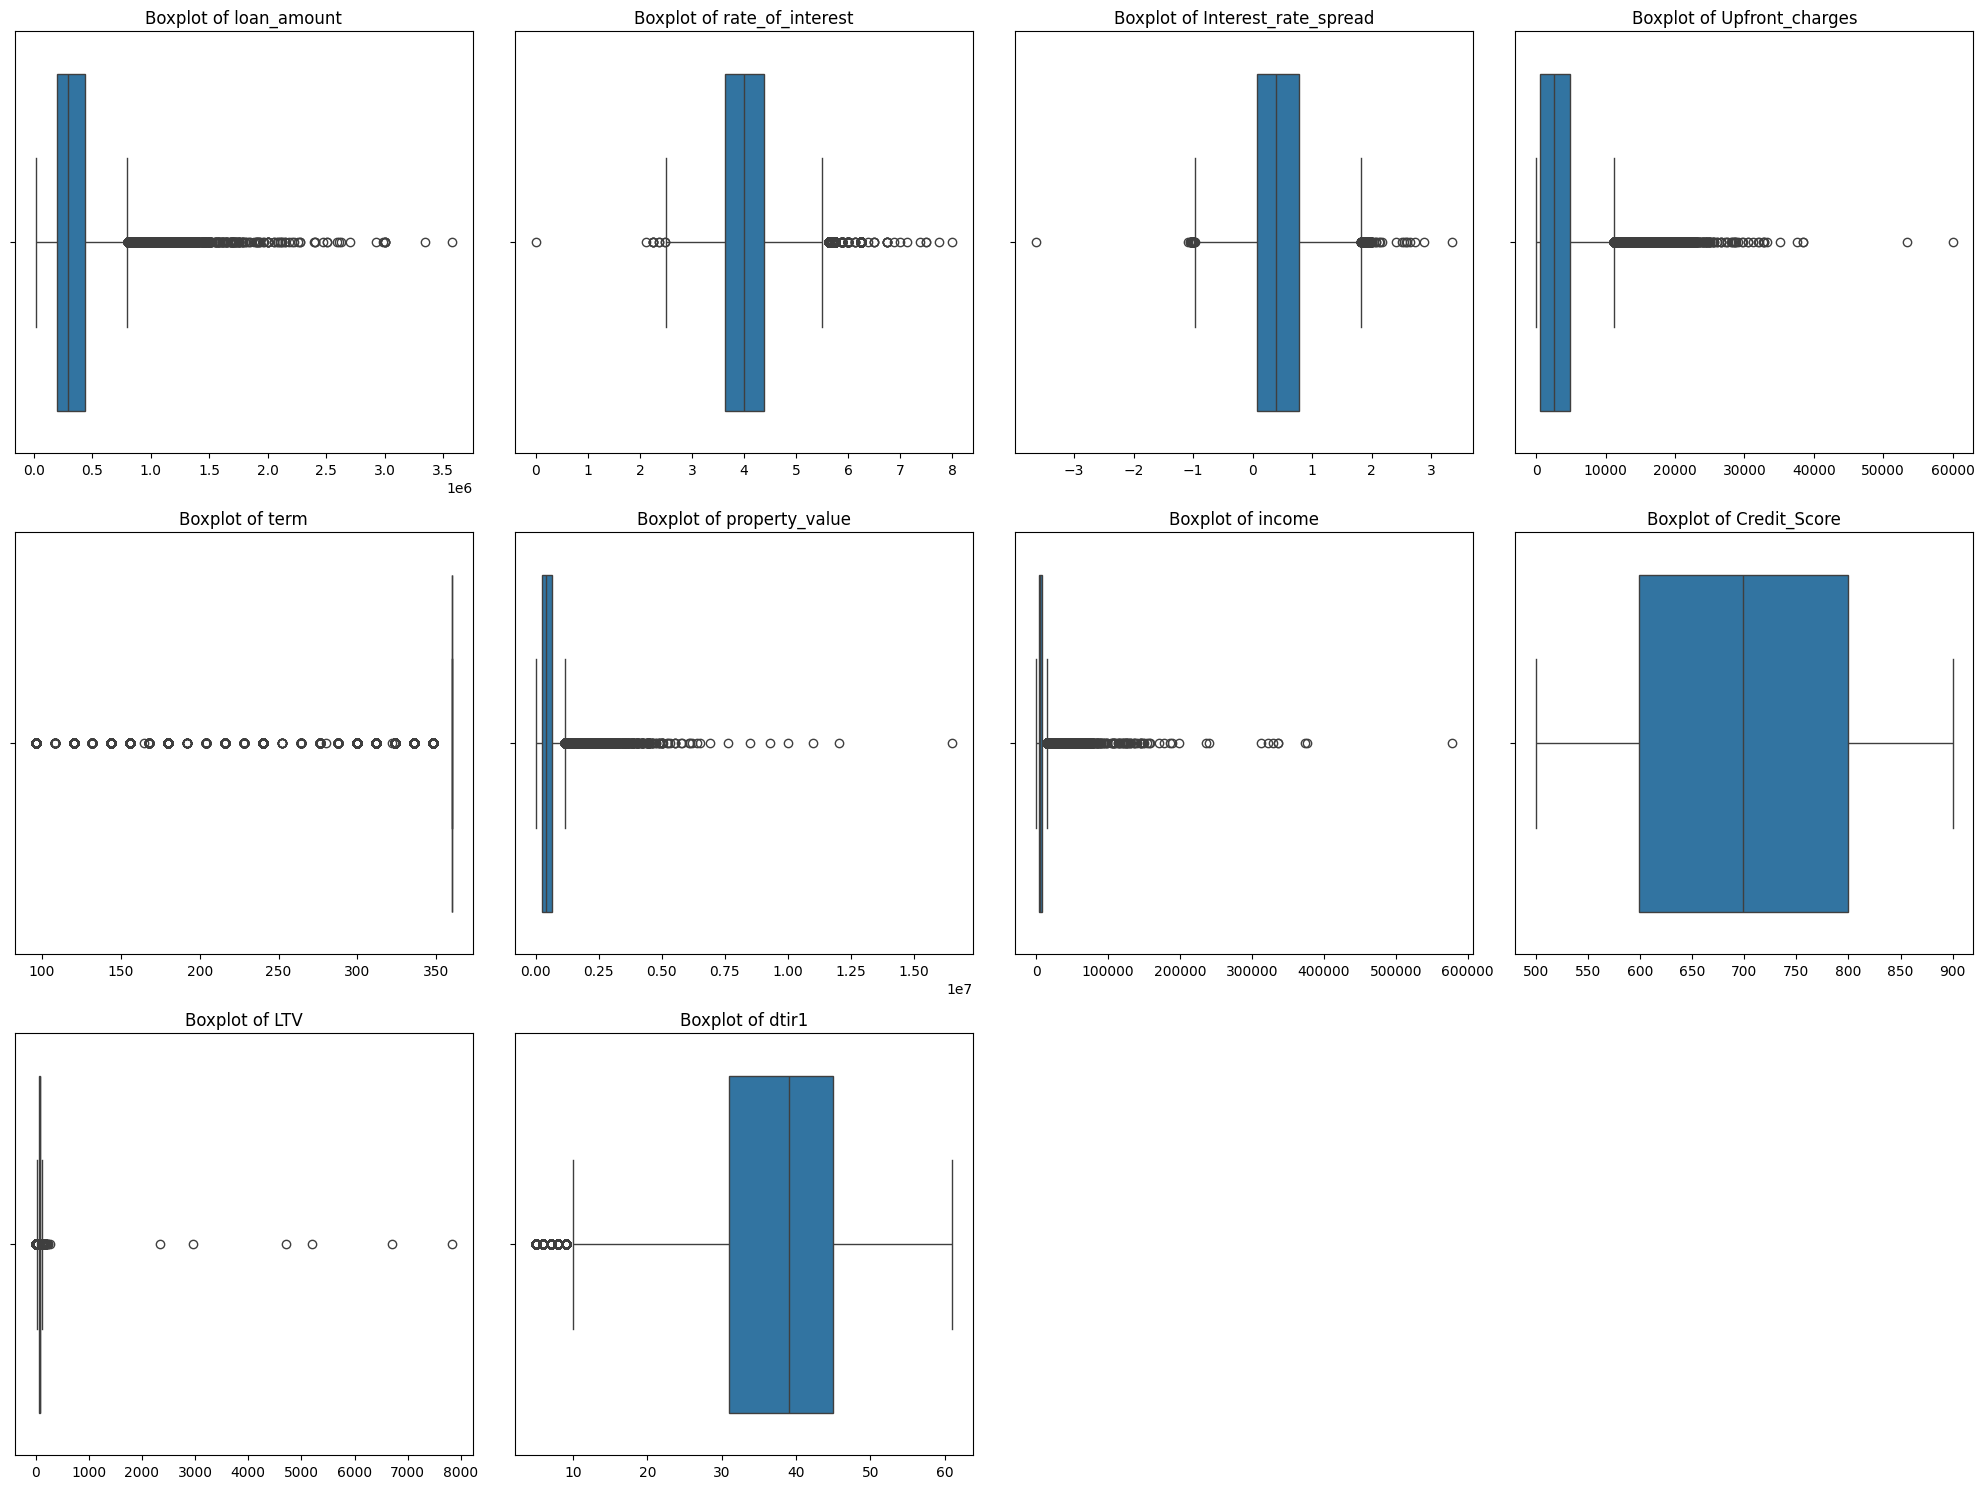

In [ ]:
rows = (len(plot_cols) + 3) // 4
fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 5))
axes = axes.flatten()

for i, col in enumerate(plot_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel("")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import pointbiserialr
import numpy as np

for col in numeric_cols:
    valid_data = df[[col, 'Status']].dropna()
    if not valid_data.empty:
        corr, p_value = pointbiserialr(valid_data['Status'], valid_data[col])
        if isinstance(corr, np.ndarray) or isinstance(p_value, np.ndarray) or np.isnan(corr) or np.isnan(p_value):
            print(f"{col}: correlation or p-value is not a valid number.")
        else:
            print(f"{col}: correlation = {corr:.3f}, p-value = {p_value:.3e}")
    else:
        print(f"{col}: No valid data for correlation.")


ID: correlation = 0.002, p-value = 5.114e-01
year: correlation or p-value is not a valid number.
loan_amount: correlation = -0.037, p-value = 8.691e-46
rate_of_interest: correlation = 0.023, p-value = 1.451e-14
Interest_rate_spread: correlation or p-value is not a valid number.
Upfront_charges: correlation = -0.019, p-value = 2.620e-10
term: correlation = -0.000, p-value = 9.263e-01
property_value: correlation = -0.049, p-value = 2.052e-71
income: correlation = -0.065, p-value = 5.925e-131
Credit_Score: correlation = 0.004, p-value = 1.227e-01
LTV: correlation = 0.039, p-value = 6.829e-46
Status: correlation or p-value is not a valid number.
dtir1: correlation = 0.078, p-value = 1.158e-167


/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:5405: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:5405: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)


✅ ما الذي نستنتجه؟
كل معاملات الارتباط ضعيفة (< 0.1)، مما يعني أنه لا يوجد متغير رقمي واحد قوي في التنبؤ بـ Status بمفرده.

لكن كثير منها دال إحصائيًا (p < 0.05)، خاصة income, loan_amount, dtir1, property_value.

بعض المتغيرات لا معنى لاستخدامها في النمذجة مثل ID, year, term.

✳️ التوصيات:
احفظ المتغيرات الرقمية الدالة إحصائيًا، حتى لو الارتباط ضعيف، لأن النموذج قد يستفيد منها معًا.

احذف أو تجاهل المتغيرات غير الدالة مثل term, Credit_Score, ID, year.



###Further Analysis of Missing Data

In [ ]:
for col in df:
    missing_by_status = df[df[col].isnull()]['Status'].value_counts(normalize=True)
    print(f"{col} missing breakdown:\n{missing_by_status}\n")

ID missing breakdown:
Series([], Name: proportion, dtype: float64)

year missing breakdown:
Series([], Name: proportion, dtype: float64)

loan_limit missing breakdown:
Status
0    0.736543
1    0.263457
Name: proportion, dtype: float64

Gender missing breakdown:
Series([], Name: proportion, dtype: float64)

approv_in_adv missing breakdown:
Status
0    0.734581
1    0.265419
Name: proportion, dtype: float64

loan_type missing breakdown:
Series([], Name: proportion, dtype: float64)

loan_purpose missing breakdown:
Status
0    0.738806
1    0.261194
Name: proportion, dtype: float64

Credit_Worthiness missing breakdown:
Series([], Name: proportion, dtype: float64)

open_credit missing breakdown:
Series([], Name: proportion, dtype: float64)

business_or_commercial missing breakdown:
Series([], Name: proportion, dtype: float64)

loan_amount missing breakdown:
Series([], Name: proportion, dtype: float64)

rate_of_interest missing breakdown:
Status
1    1.0
Name: proportion, dtype: float64

In

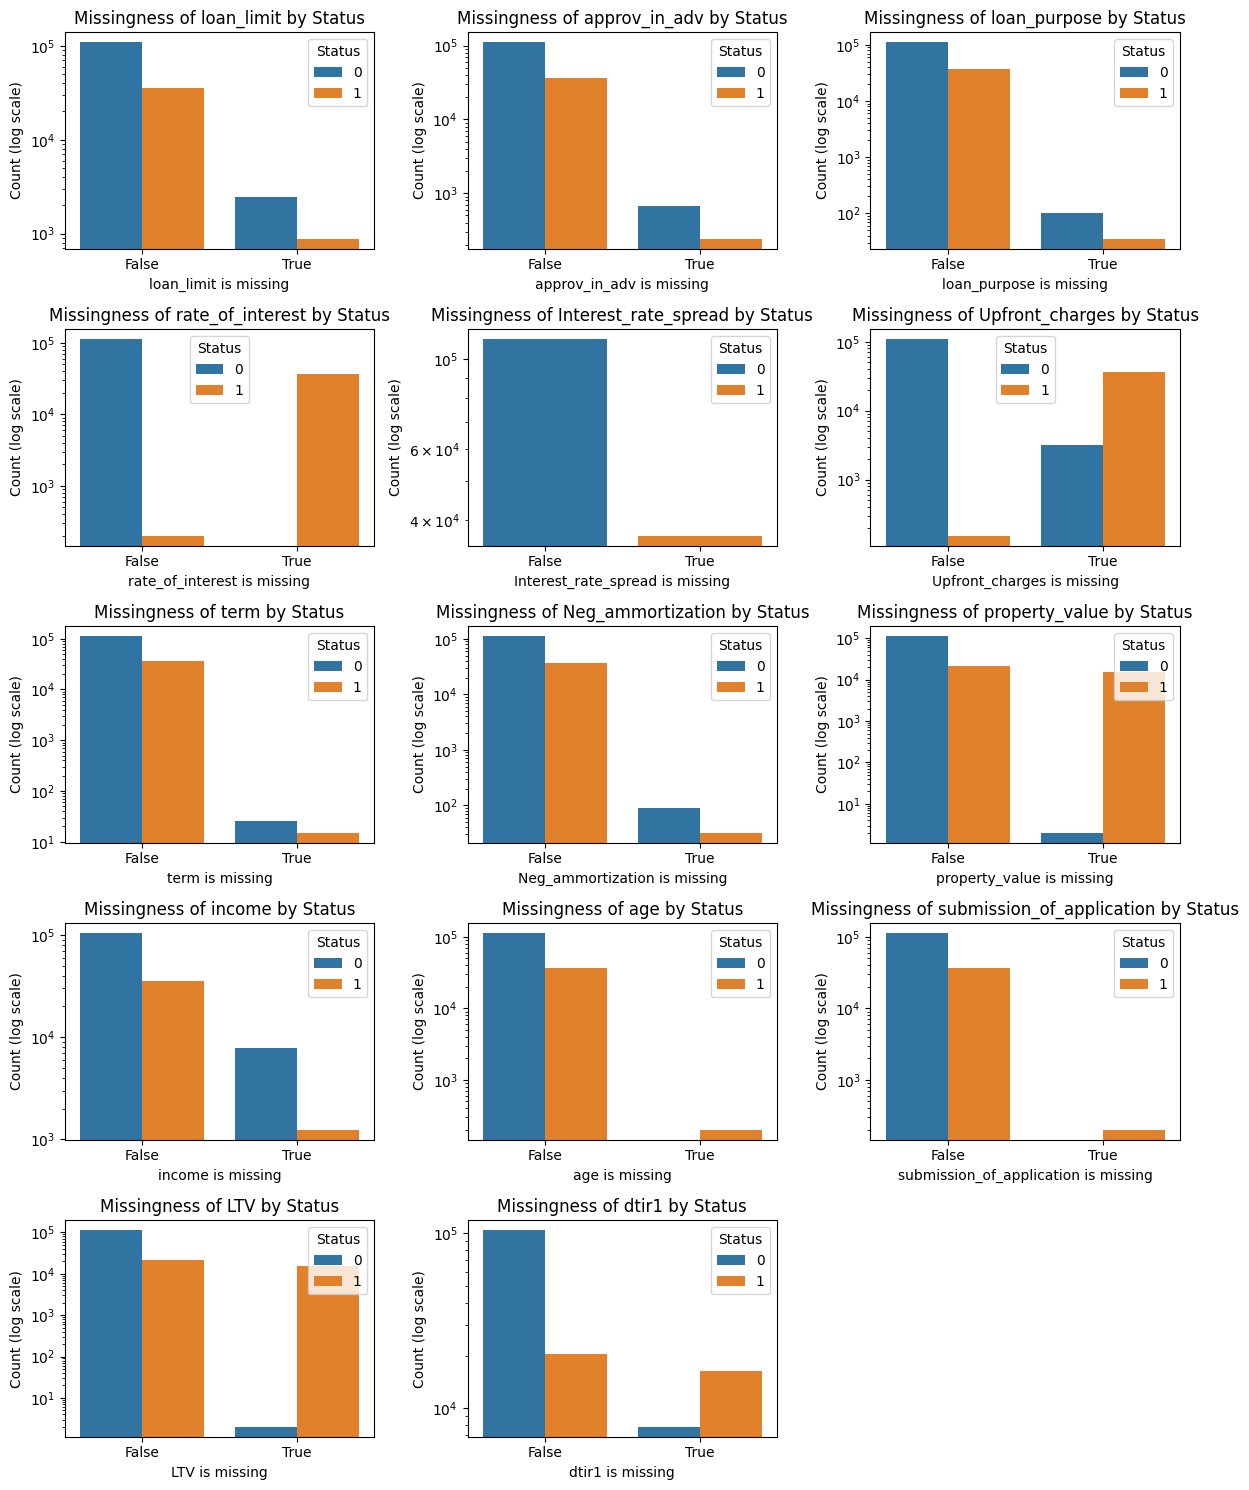

In [ ]:

cols_with_missing = df.columns[df.isnull().any()].tolist()

n_cols = 3
n_rows = (len(cols_with_missing) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten()
for i, col in enumerate(cols_with_missing):
    missing_col_name = f'{col}_is_missing'
    df[missing_col_name] = df[col].isnull()

    sns.countplot(x=missing_col_name, hue='Status', data=df, ax=axes[i])
    axes[i].set_title(f'Missingness of {col} by Status')
    axes[i].set_xlabel(f'{col} is missing')
    axes[i].set_ylabel('Count (log scale)')
    axes[i].set_yscale('log')

    df.drop(columns=[missing_col_name], inplace=True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


##Univariate Analysis - Categorical Data

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("عدد المتغيرات الفئوية:", len(categorical_cols))
categorical_cols


عدد المتغيرات الفئوية: 21


['loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'Region',
 'Security_Type']

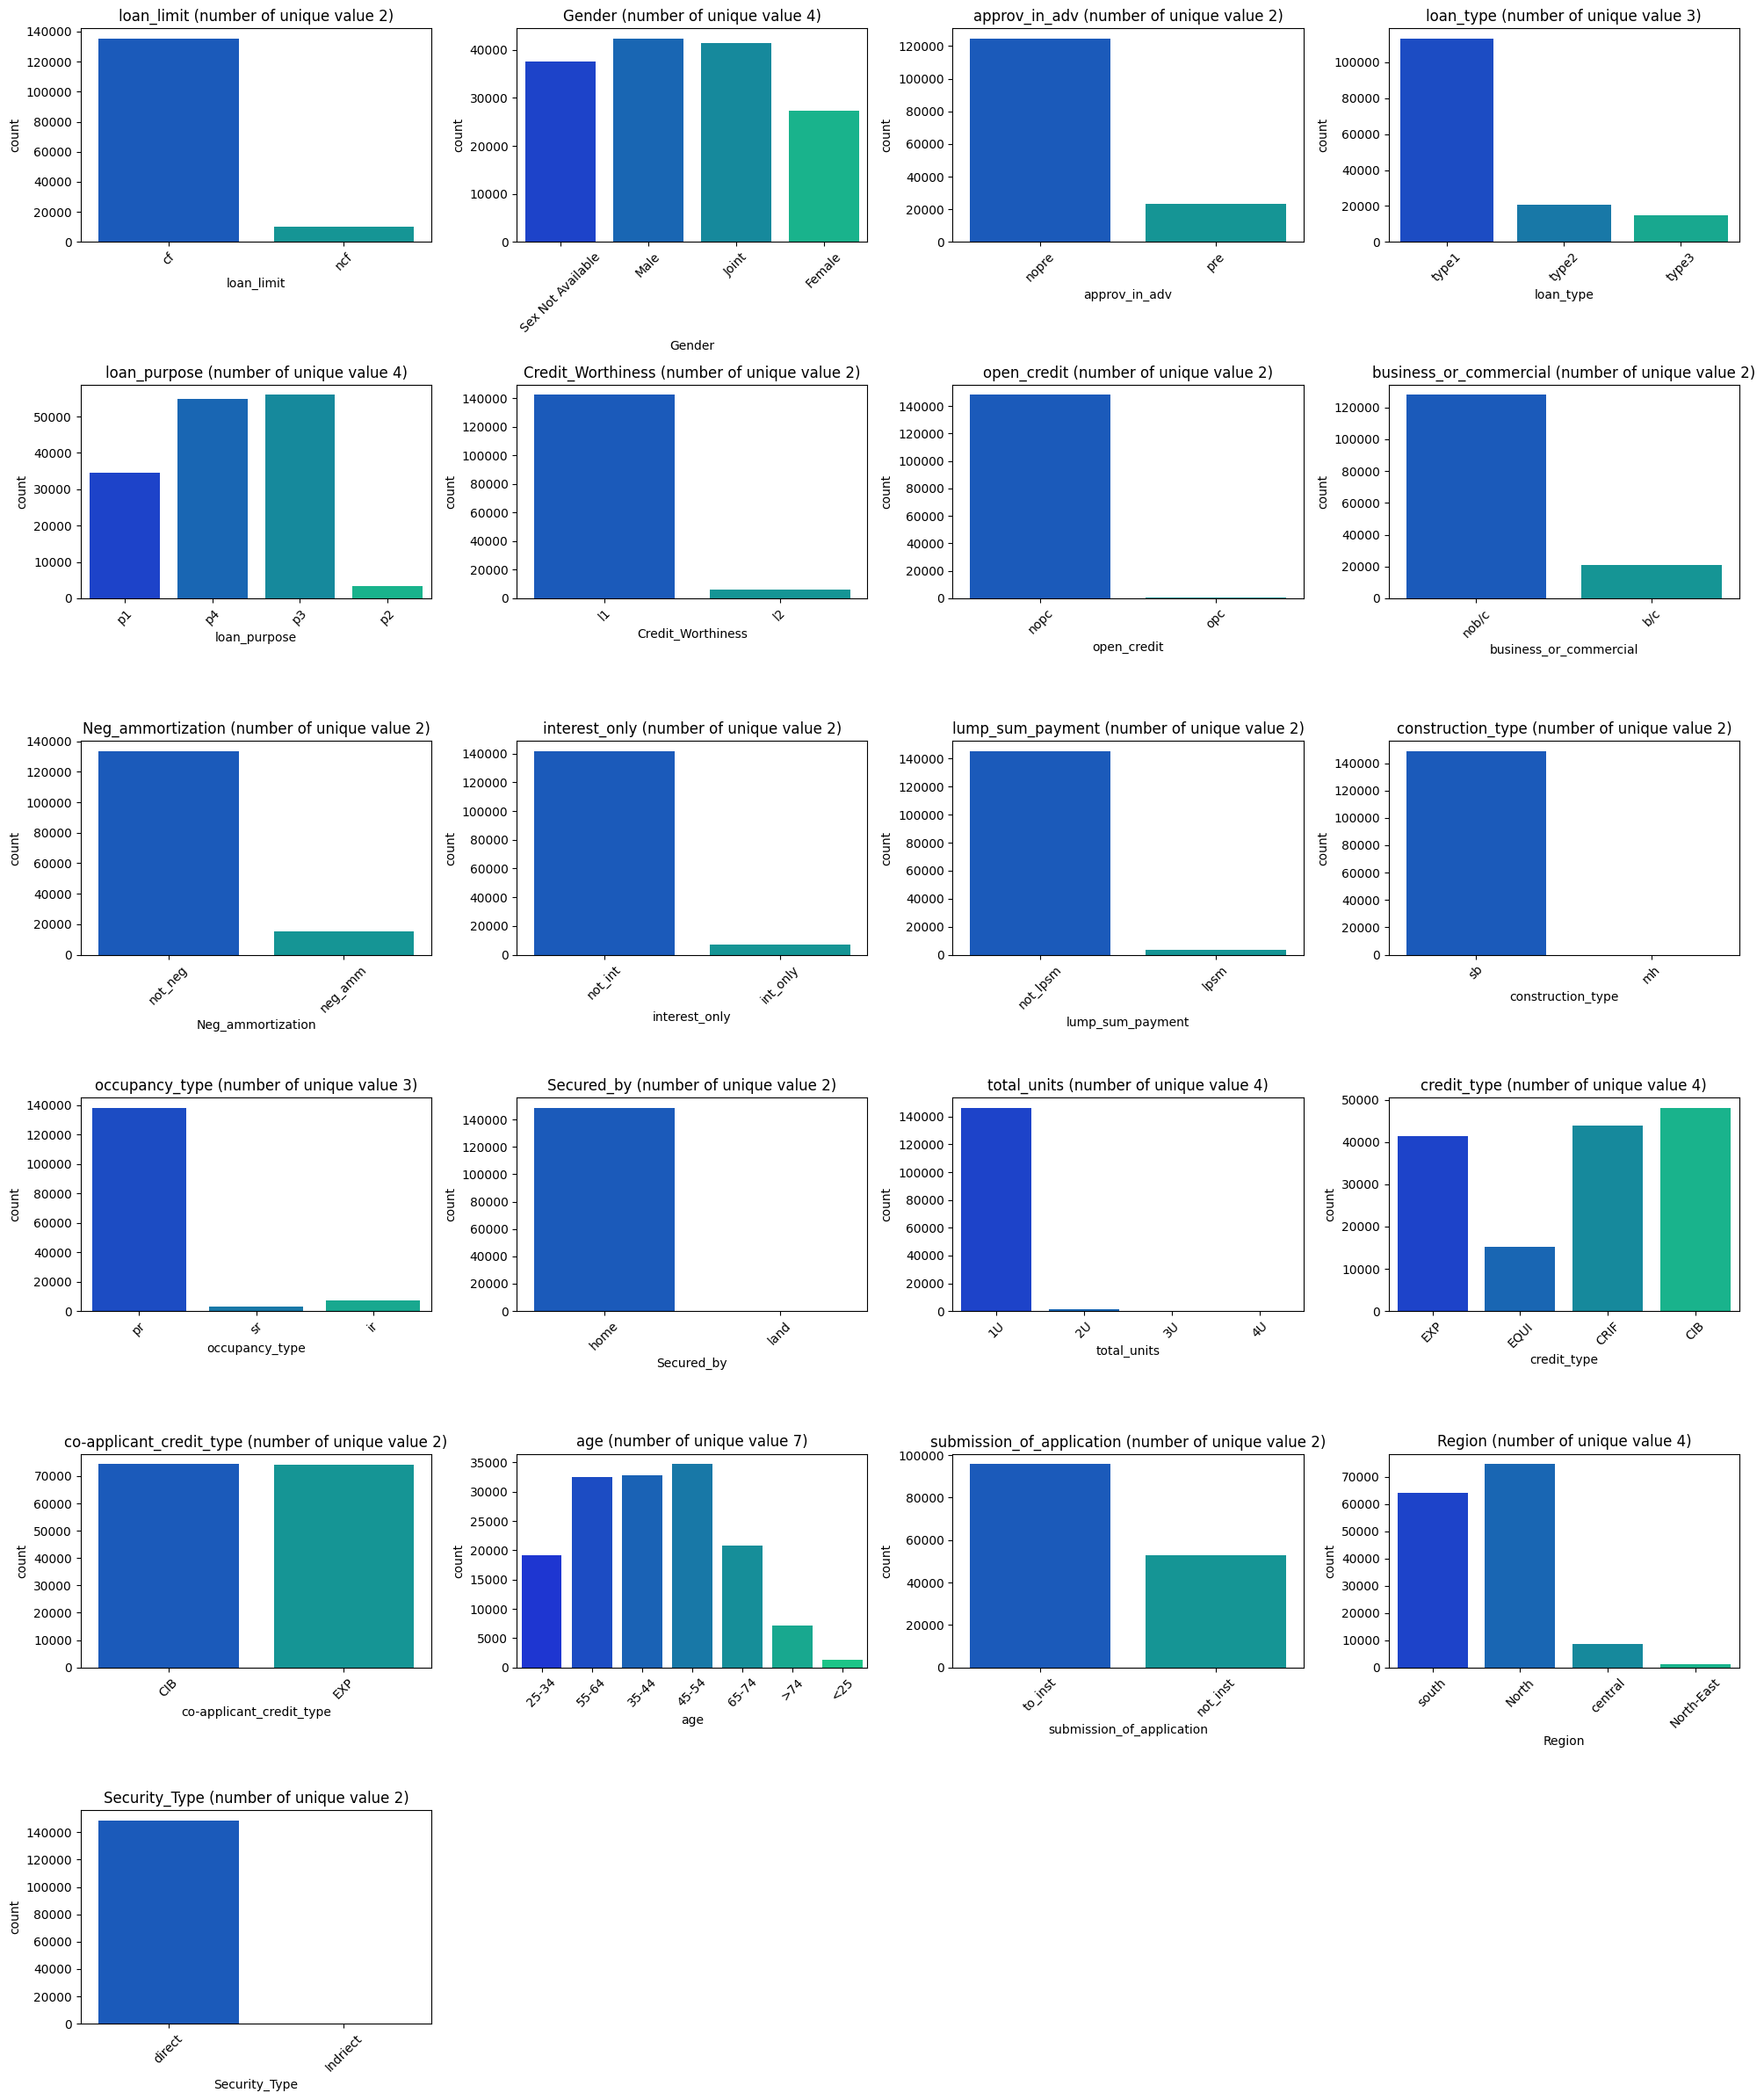

In [ ]:
num_cols = len(categorical_cols)

n_cols = 4
n_rows = (num_cols + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i],palette='winter')
    axes[i].set_title(f"{col} (number of unique value {df[col].nunique()})")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
rare_threshold = 0.01
for col in categorical_cols:
    freqs = df[col].value_counts(normalize=True)
    rare_categories = freqs[freqs < rare_threshold]
    if not rare_categories.empty:
        print(f"\n {col} يحتوي على قيم نادرة:")
        print(rare_categories)



 open_credit يحتوي على قيم نادرة:
open_credit
opc    0.00374
Name: proportion, dtype: float64

 construction_type يحتوي على قيم نادرة:
construction_type
mh    0.000222
Name: proportion, dtype: float64

 Secured_by يحتوي على قيم نادرة:
Secured_by
land    0.000222
Name: proportion, dtype: float64

 total_units يحتوي على قيم نادرة:
total_units
2U    0.009935
3U    0.002643
4U    0.002152
Name: proportion, dtype: float64

 age يحتوي على قيم نادرة:
age
<25    0.009005
Name: proportion, dtype: float64

 Region يحتوي على قيم نادرة:
Region
North-East    0.008307
Name: proportion, dtype: float64

 Security_Type يحتوي على قيم نادرة:
Security_Type
Indriect    0.000222
Name: proportion, dtype: float64


##Bivariate Analysis

loan_amount  rate_of_interest
loan_amount          1.000000         -0.150844
rate_of_interest    -0.150844          1.000000

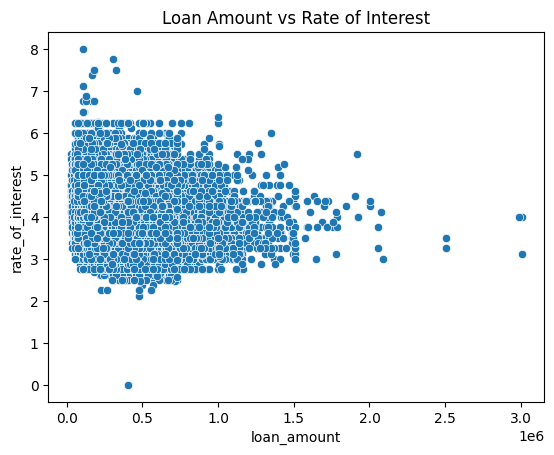

In [ ]:
sns.scatterplot(data=df, x='loan_amount', y='rate_of_interest')
plt.title('Loan Amount vs Rate of Interest')
df[['loan_amount', 'rate_of_interest']].corr()


<Axes: xlabel='property_value', ylabel='loan_amount'>

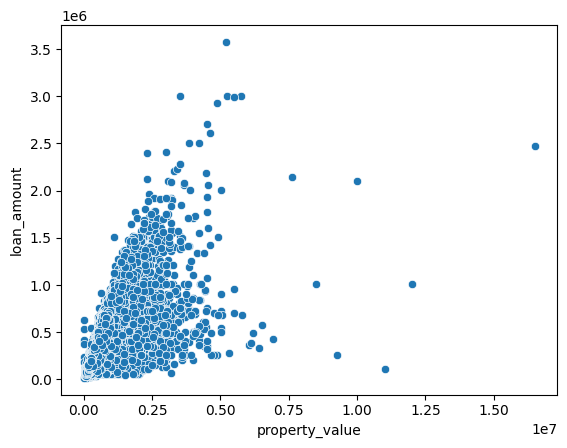

In [ ]:
sns.scatterplot(data=df, x='property_value', y='loan_amount')


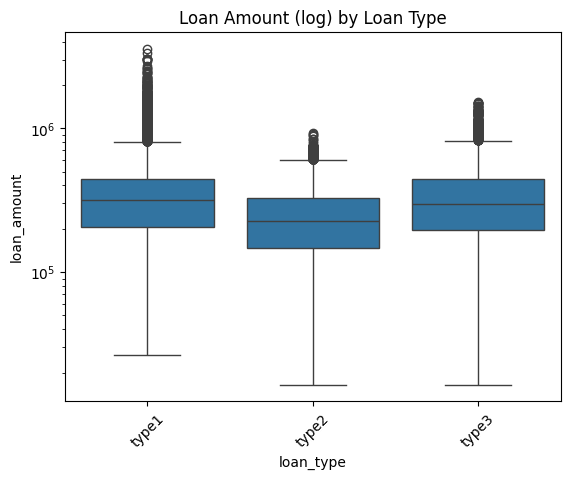

In [ ]:
sns.boxplot(data=df, x='loan_type', y='loan_amount')
plt.yscale('log')
plt.xticks(rotation=45)
plt.title("Loan Amount (log) by Loan Type")
plt.show()


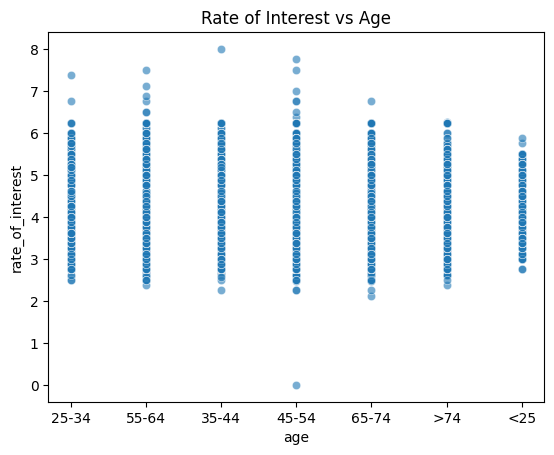

In [ ]:
sns.scatterplot(data=df, x='age', y='rate_of_interest', alpha=0.6)
plt.title('Rate of Interest vs Age')
plt.show()

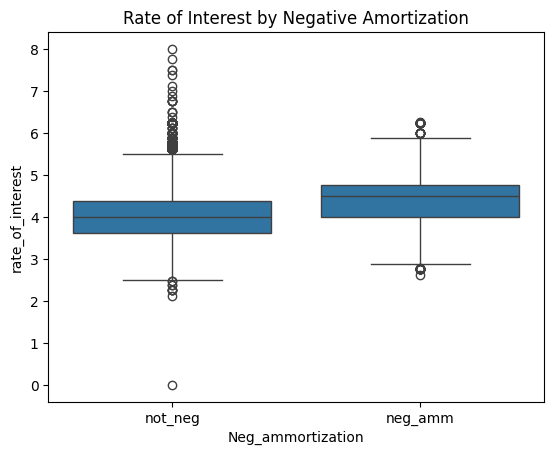

In [ ]:

sns.boxplot(data=df, x='Neg_ammortization', y='rate_of_interest')
plt.title('Rate of Interest by Negative Amortization')
plt.show()

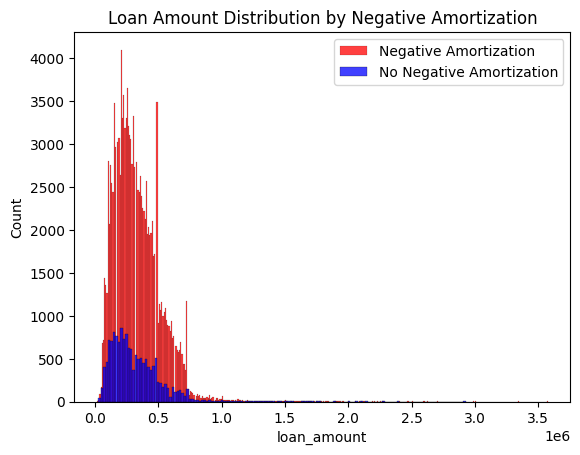

In [ ]:
# رسم histogram لمبلغ القرض بناءً على Neg_ammortization
sns.histplot(data=df[df['Neg_ammortization'] == "not_neg"], x='loan_amount', color='red', label='Negative Amortization')
sns.histplot(data=df[df['Neg_ammortization'] == "neg_amm"], x='loan_amount', color='blue', label='No Negative Amortization')
plt.legend()
plt.title('Loan Amount Distribution by Negative Amortization')
plt.show()

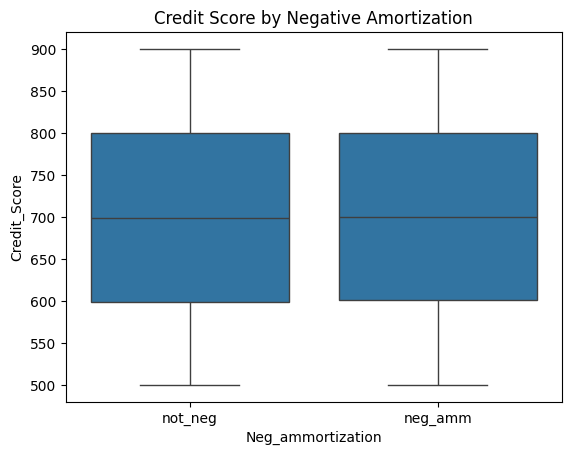

In [ ]:
# رسم boxplot للجدارة الائتمانية بناءً على Neg_ammortization
sns.boxplot(data=df, x='Neg_ammortization', y='Credit_Score')
plt.title('Credit Score by Negative Amortization')
plt.show()

loan_type           type1  type2  type3
Neg_ammortization                      
neg_amm             11492   2337   1300
not_neg            101583  18412  13425


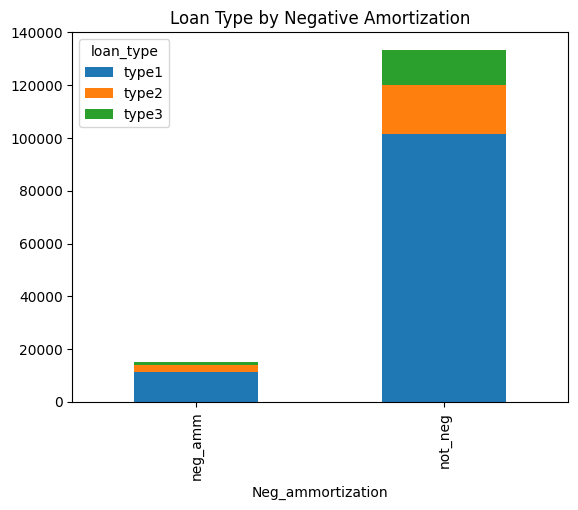

In [ ]:
# تكرار نوع القرض بناءً على Neg_ammortization
loan_type_by_neg_ammortization = pd.crosstab(df['Neg_ammortization'], df['loan_type'])
print(loan_type_by_neg_ammortization)

# رسم bar chart
loan_type_by_neg_ammortization.plot(kind='bar', stacked=True)
plt.title('Loan Type by Negative Amortization')
plt.show()

Text(0.5, 1.0, 'Loan Status by age')

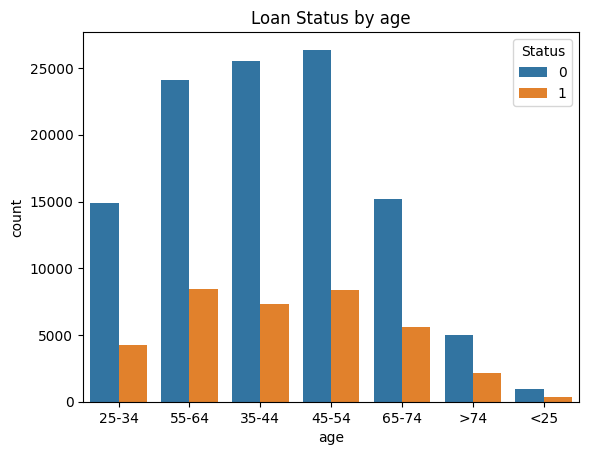

In [ ]:
sns.countplot(data=df, x='age', hue='Status')
plt.title('Loan Status by age')


Text(0.5, 1.0, 'Loan Status by Gender')

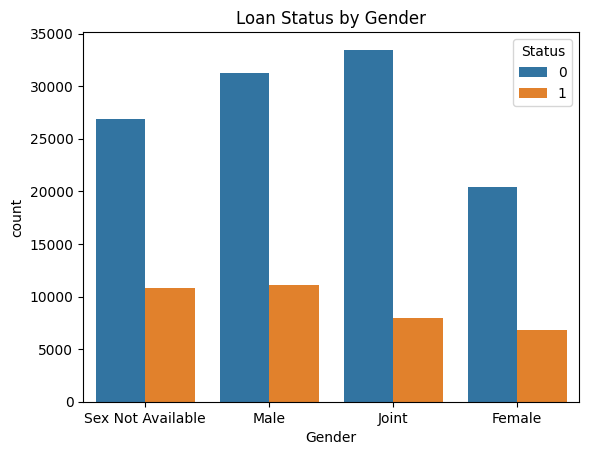

In [ ]:
sns.countplot(data=df, x='Gender', hue='Status')
plt.title('Loan Status by Gender')


Text(0.5, 1.0, 'LTV vs Loan Status (Limited Y-axis)')

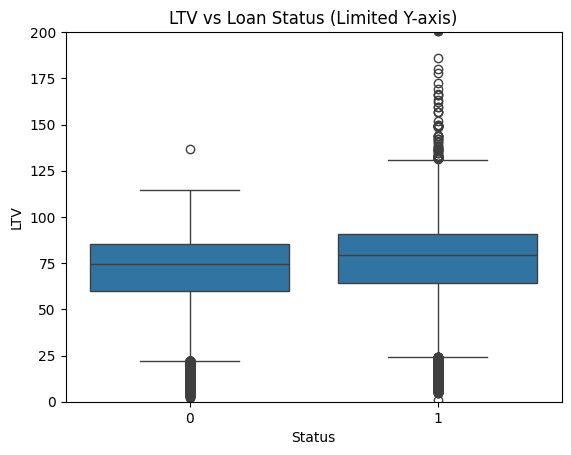

In [ ]:
sns.boxplot(data=df, x='Status', y='LTV')
plt.ylim(0, 200)  # تحديد النطاق الذي تريد عرضه
plt.title('LTV vs Loan Status (Limited Y-axis)')


<Axes: xlabel='Status', ylabel='Credit_Score'>

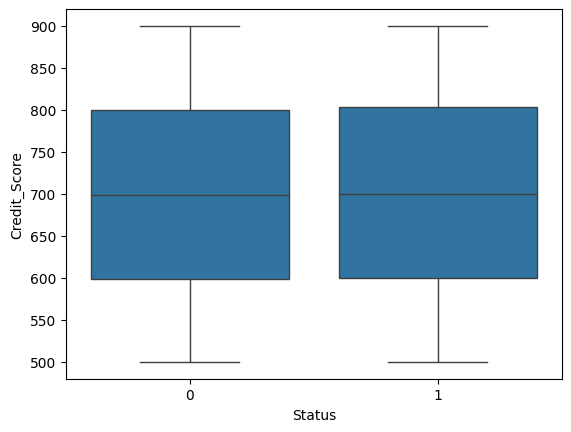

In [ ]:
sns.boxplot(data=df, x='Status', y='Credit_Score')


([0, 1, 2, 3],
 [Text(0, 0, 'p1'), Text(1, 0, 'p4'), Text(2, 0, 'p3'), Text(3, 0, 'p2')])

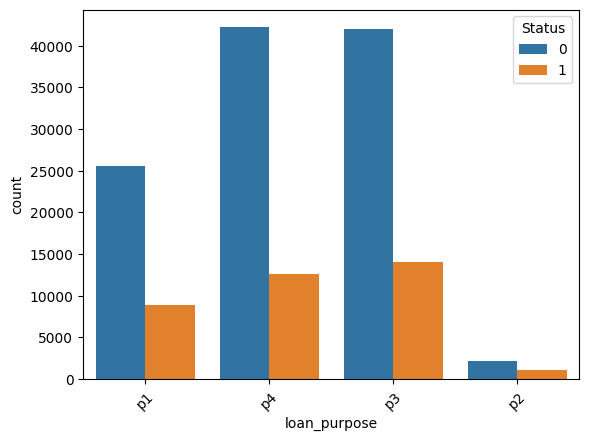

In [ ]:
sns.countplot(data=df, x='loan_purpose', hue='Status')
plt.xticks(rotation=45)


([0, 1, 2, 3],
 [Text(0, 0, 'p1'), Text(1, 0, 'p4'), Text(2, 0, 'p3'), Text(3, 0, 'p2')])

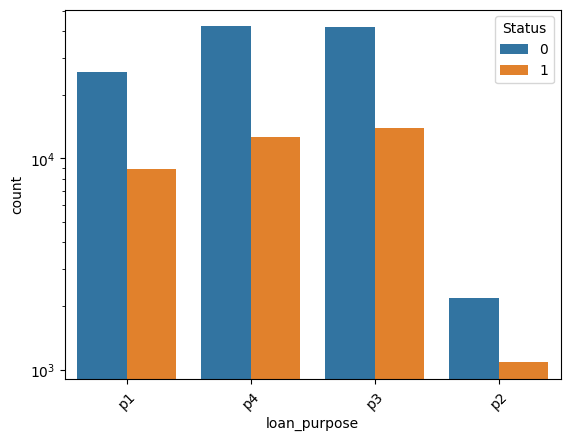

In [ ]:
d=sns.countplot(data=df, x='loan_purpose', hue='Status')
d.set(yscale="log")

plt.xticks(rotation=45)


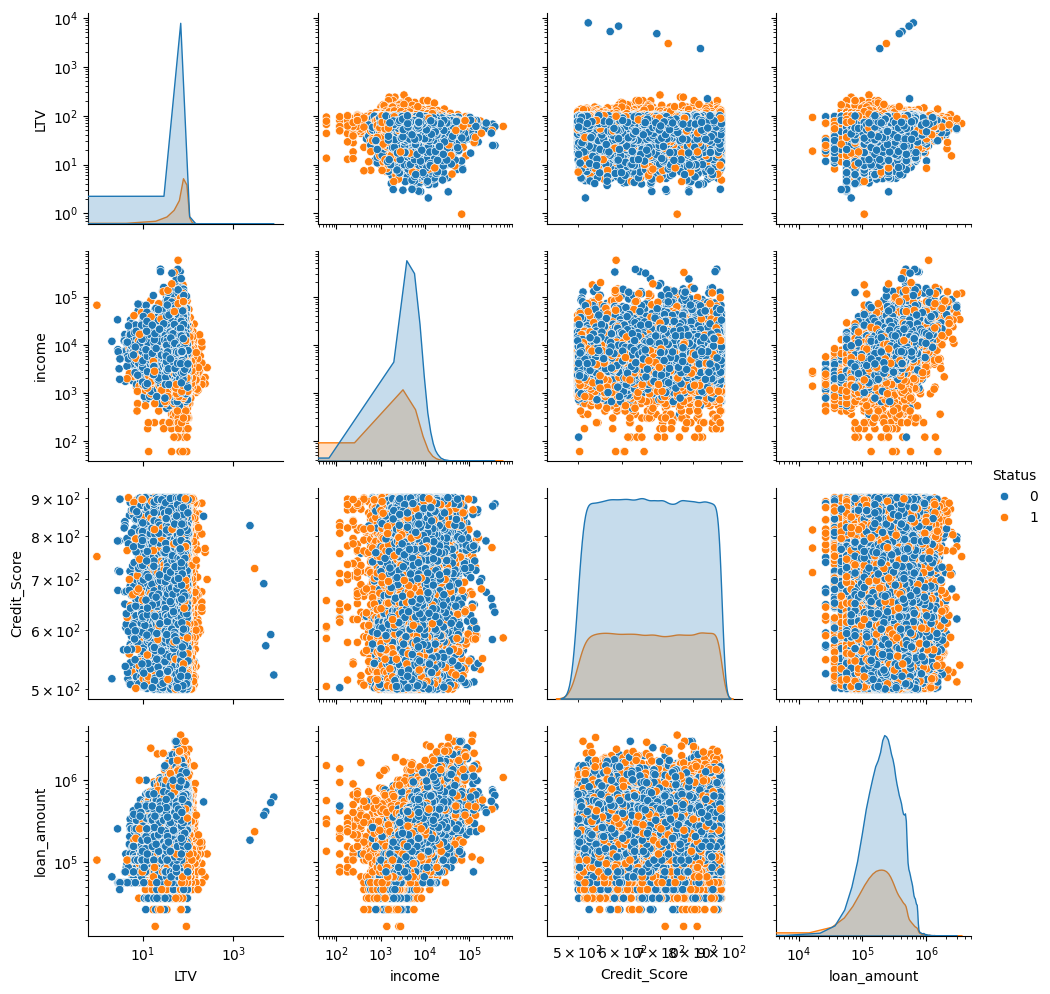

In [ ]:
g = sns.pairplot(
    data=df,
    vars=['LTV', 'income', 'Credit_Score', 'loan_amount'],
    hue='Status'
)

for ax in g.axes.flat:
    ax.set(xscale="log", yscale="log")

plt.show()

##Multivariate Analysis

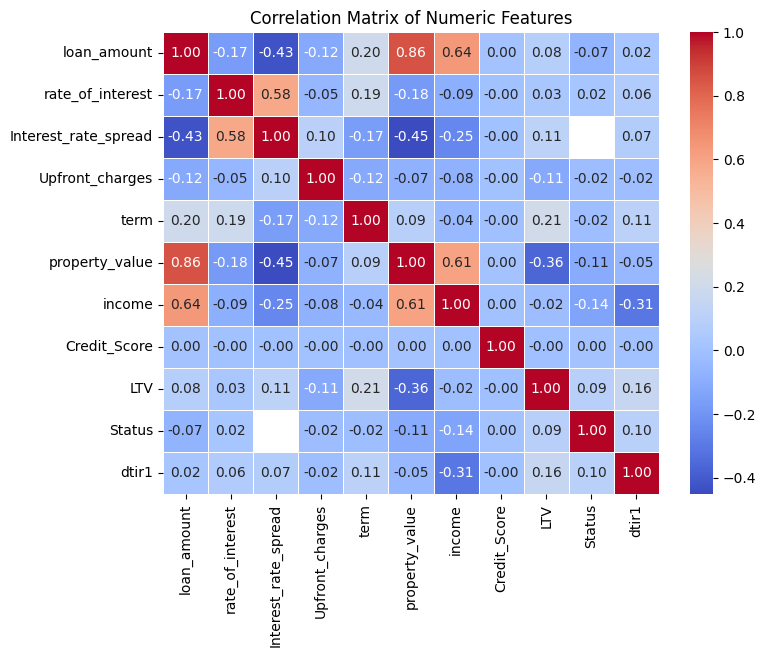

In [ ]:
numeric_df = df.select_dtypes(include=np.number)
cols_to_exclude_corr = ['ID', 'year']
numeric_df_corr = numeric_df.drop(columns=cols_to_exclude_corr, errors='ignore')

correlation_matrix = numeric_df_corr.corr(method='spearman')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


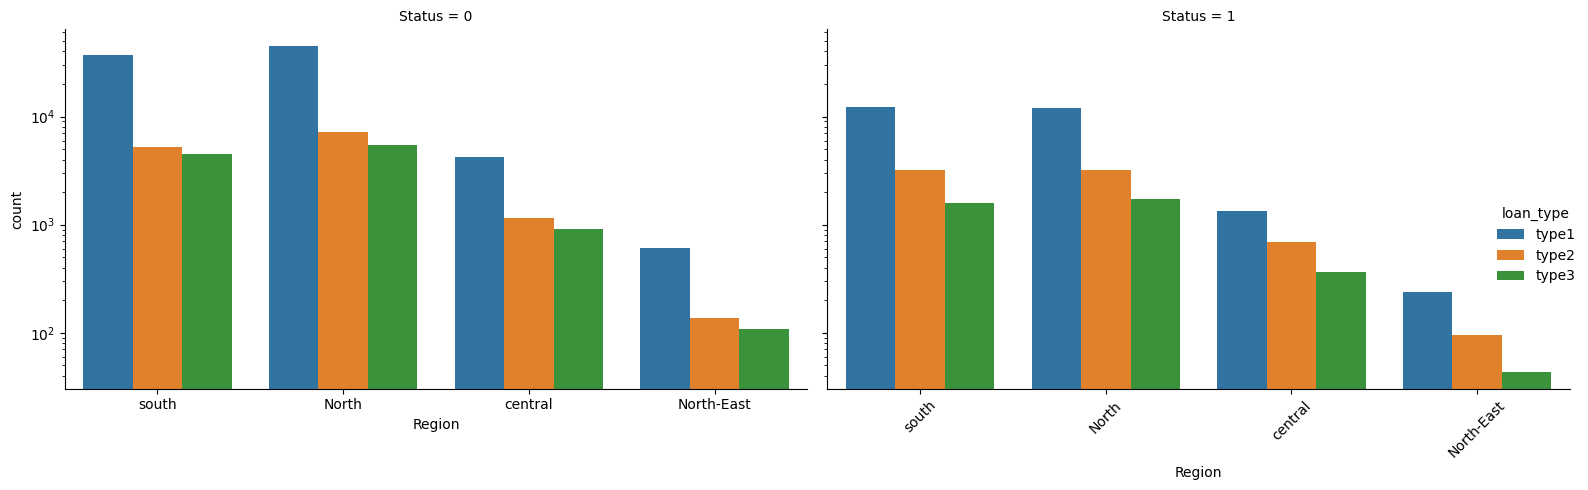

In [ ]:
g = sns.catplot(
    data=df, x='Region', hue='loan_type', col='Status',
    kind='count', height=5, aspect=1.5
)

g.set(yscale="log")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

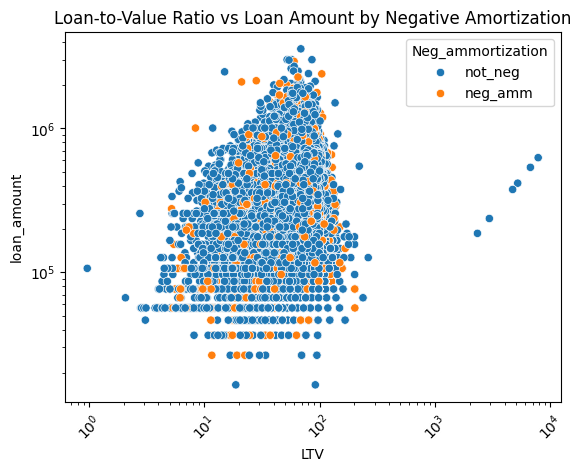

In [ ]:
# رسم scatter plot لنسبة القرض إلى قيمة العقار بناءً على Neg_ammortization
h=sns.scatterplot(data=df, x='LTV', y='loan_amount', hue='Neg_ammortization')
plt.title('Loan-to-Value Ratio vs Loan Amount by Negative Amortization')

h.set(xscale="log")
h.set(yscale="log")
plt.xticks(rotation=45)
plt.show()

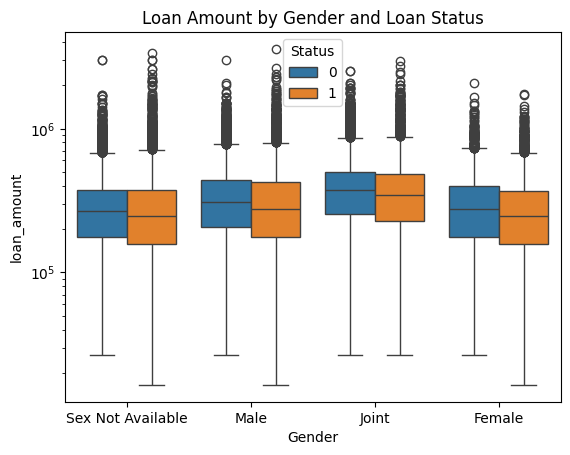

In [ ]:
sns.boxplot(data=df, x='Gender', y='loan_amount', hue='Status')
plt.title('Loan Amount by Gender and Loan Status')
plt.yscale('log')
plt.show()


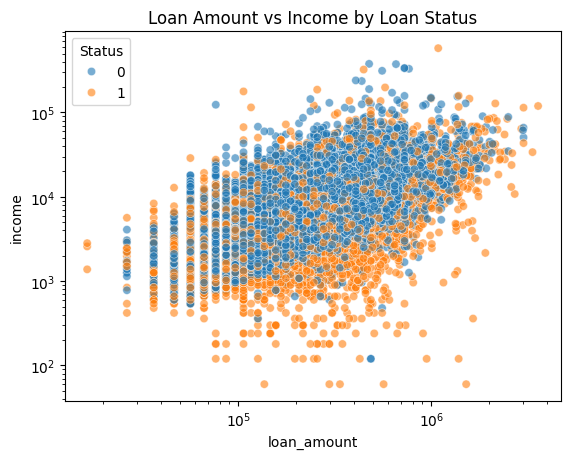

In [ ]:
sns.scatterplot(data=df, x='loan_amount', y='income', hue='Status', alpha=0.6)
plt.title('Loan Amount vs Income by Loan Status')
plt.xscale('log')
plt.yscale('log')
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

for col in categorical_cols:
    if df[col].nunique() < 30:
        contingency = pd.crosstab(df[col], df['Status'])
        chi2, p, dof, ex = chi2_contingency(contingency)
        print(f"{col}: Chi2 = {chi2:.2f}, p = {p:.4f}")


loan_limit: Chi2 = 427.40, p = 0.0000
Gender: Chi2 = 1043.60, p = 0.0000
approv_in_adv: Chi2 = 206.40, p = 0.0000
loan_type: Chi2 = 1309.96, p = 0.0000
loan_purpose: Chi2 = 240.21, p = 0.0000
Credit_Worthiness: Chi2 = 180.42, p = 0.0000
open_credit: Chi2 = 14.43, p = 0.0001
business_or_commercial: Chi2 = 1272.81, p = 0.0000
Neg_ammortization: Chi2 = 3610.21, p = 0.0000
interest_only: Chi2 = 28.49, p = 0.0000
lump_sum_payment: Chi2 = 5237.83, p = 0.0000
construction_type: Chi2 = 96.91, p = 0.0000
occupancy_type: Chi2 = 131.83, p = 0.0000
Secured_by: Chi2 = 96.91, p = 0.0000
total_units: Chi2 = 123.99, p = 0.0000
credit_type: Chi2 = 52135.28, p = 0.0000
co-applicant_credit_type: Chi2 = 3092.39, p = 0.0000
age: Chi2 = 374.50, p = 0.0000
submission_of_application: Chi2 = 2171.71, p = 0.0000
Region: Chi2 = 380.46, p = 0.0000
Security_Type: Chi2 = 96.91, p = 0.0000


#preprossing & handeling missing value

##Treating outliear

In [58]:
for col in ['loan_amount', 'Upfront_charges', 'income', 'property_value']:
    # df = df[df[col] > 0]
    df[f'{col}_log'] = np.log1p(df[col])


In [59]:
def categorize_term(term):
    if pd.isna(term):
        return np.nan
    elif term <= 180:
        return 0
    elif term < 360:
        return 1
    elif term == 360:
        return 2

df['term_cat'] = df['term'].apply(categorize_term)


In [60]:
lower_bound =df['loan_amount_log'].quantile(0.01)
upper_bound = df['loan_amount_log'].quantile(0.99)

df['loan_amount_log'] = df['loan_amount_log'].clip(lower=lower_bound, upper=upper_bound)


In [61]:
lower_bound = df['Upfront_charges_log'].quantile(0.08)
upper_bound = df['Upfront_charges_log'].quantile(0.98)

df['Upfront_charges_log'] = df['Upfront_charges_log'].clip(lower=lower_bound, upper=upper_bound)

In [62]:
lower_bound = df['income_log'].quantile(0.02)
upper_bound = df['income_log'].quantile(0.99)


df['income_log'] = df['income_log'].clip(lower=lower_bound, upper=upper_bound)


In [63]:
lower_bound = df['property_value_log'].quantile(0.01)
upper_bound = df['property_value_log'].quantile(0.99)

df['property_value_log'] = df['property_value_log'].clip(lower=lower_bound, upper=upper_bound)


In [64]:
lower_bound = df['LTV'].quantile(0.08)
upper_bound = df['LTV'].quantile(0.98)


df['LTV'] = df['LTV'].clip(lower=lower_bound, upper=upper_bound)


In [65]:
lower_bound = df['rate_of_interest'].quantile(0.01)
upper_bound = df['rate_of_interest'].quantile(0.98)

df['rate_of_interest'] = df['rate_of_interest'].clip(lower=lower_bound, upper=upper_bound)


In [66]:
lower_bound = df['Interest_rate_spread'].quantile(0.01)
upper_bound = df['Interest_rate_spread'].quantile(0.98)

df['Interest_rate_spread'] = df['Interest_rate_spread'].clip(lower=lower_bound, upper=upper_bound)


In [67]:
lower_bound = df['dtir1'].quantile(0.02)
upper_bound = df['dtir1'].quantile(0.99)

df['dtir1'] = df['dtir1'].clip(lower=lower_bound, upper=upper_bound)


In [68]:
df=df.drop(columns=['loan_amount', 'Upfront_charges', 'income', 'property_value'])

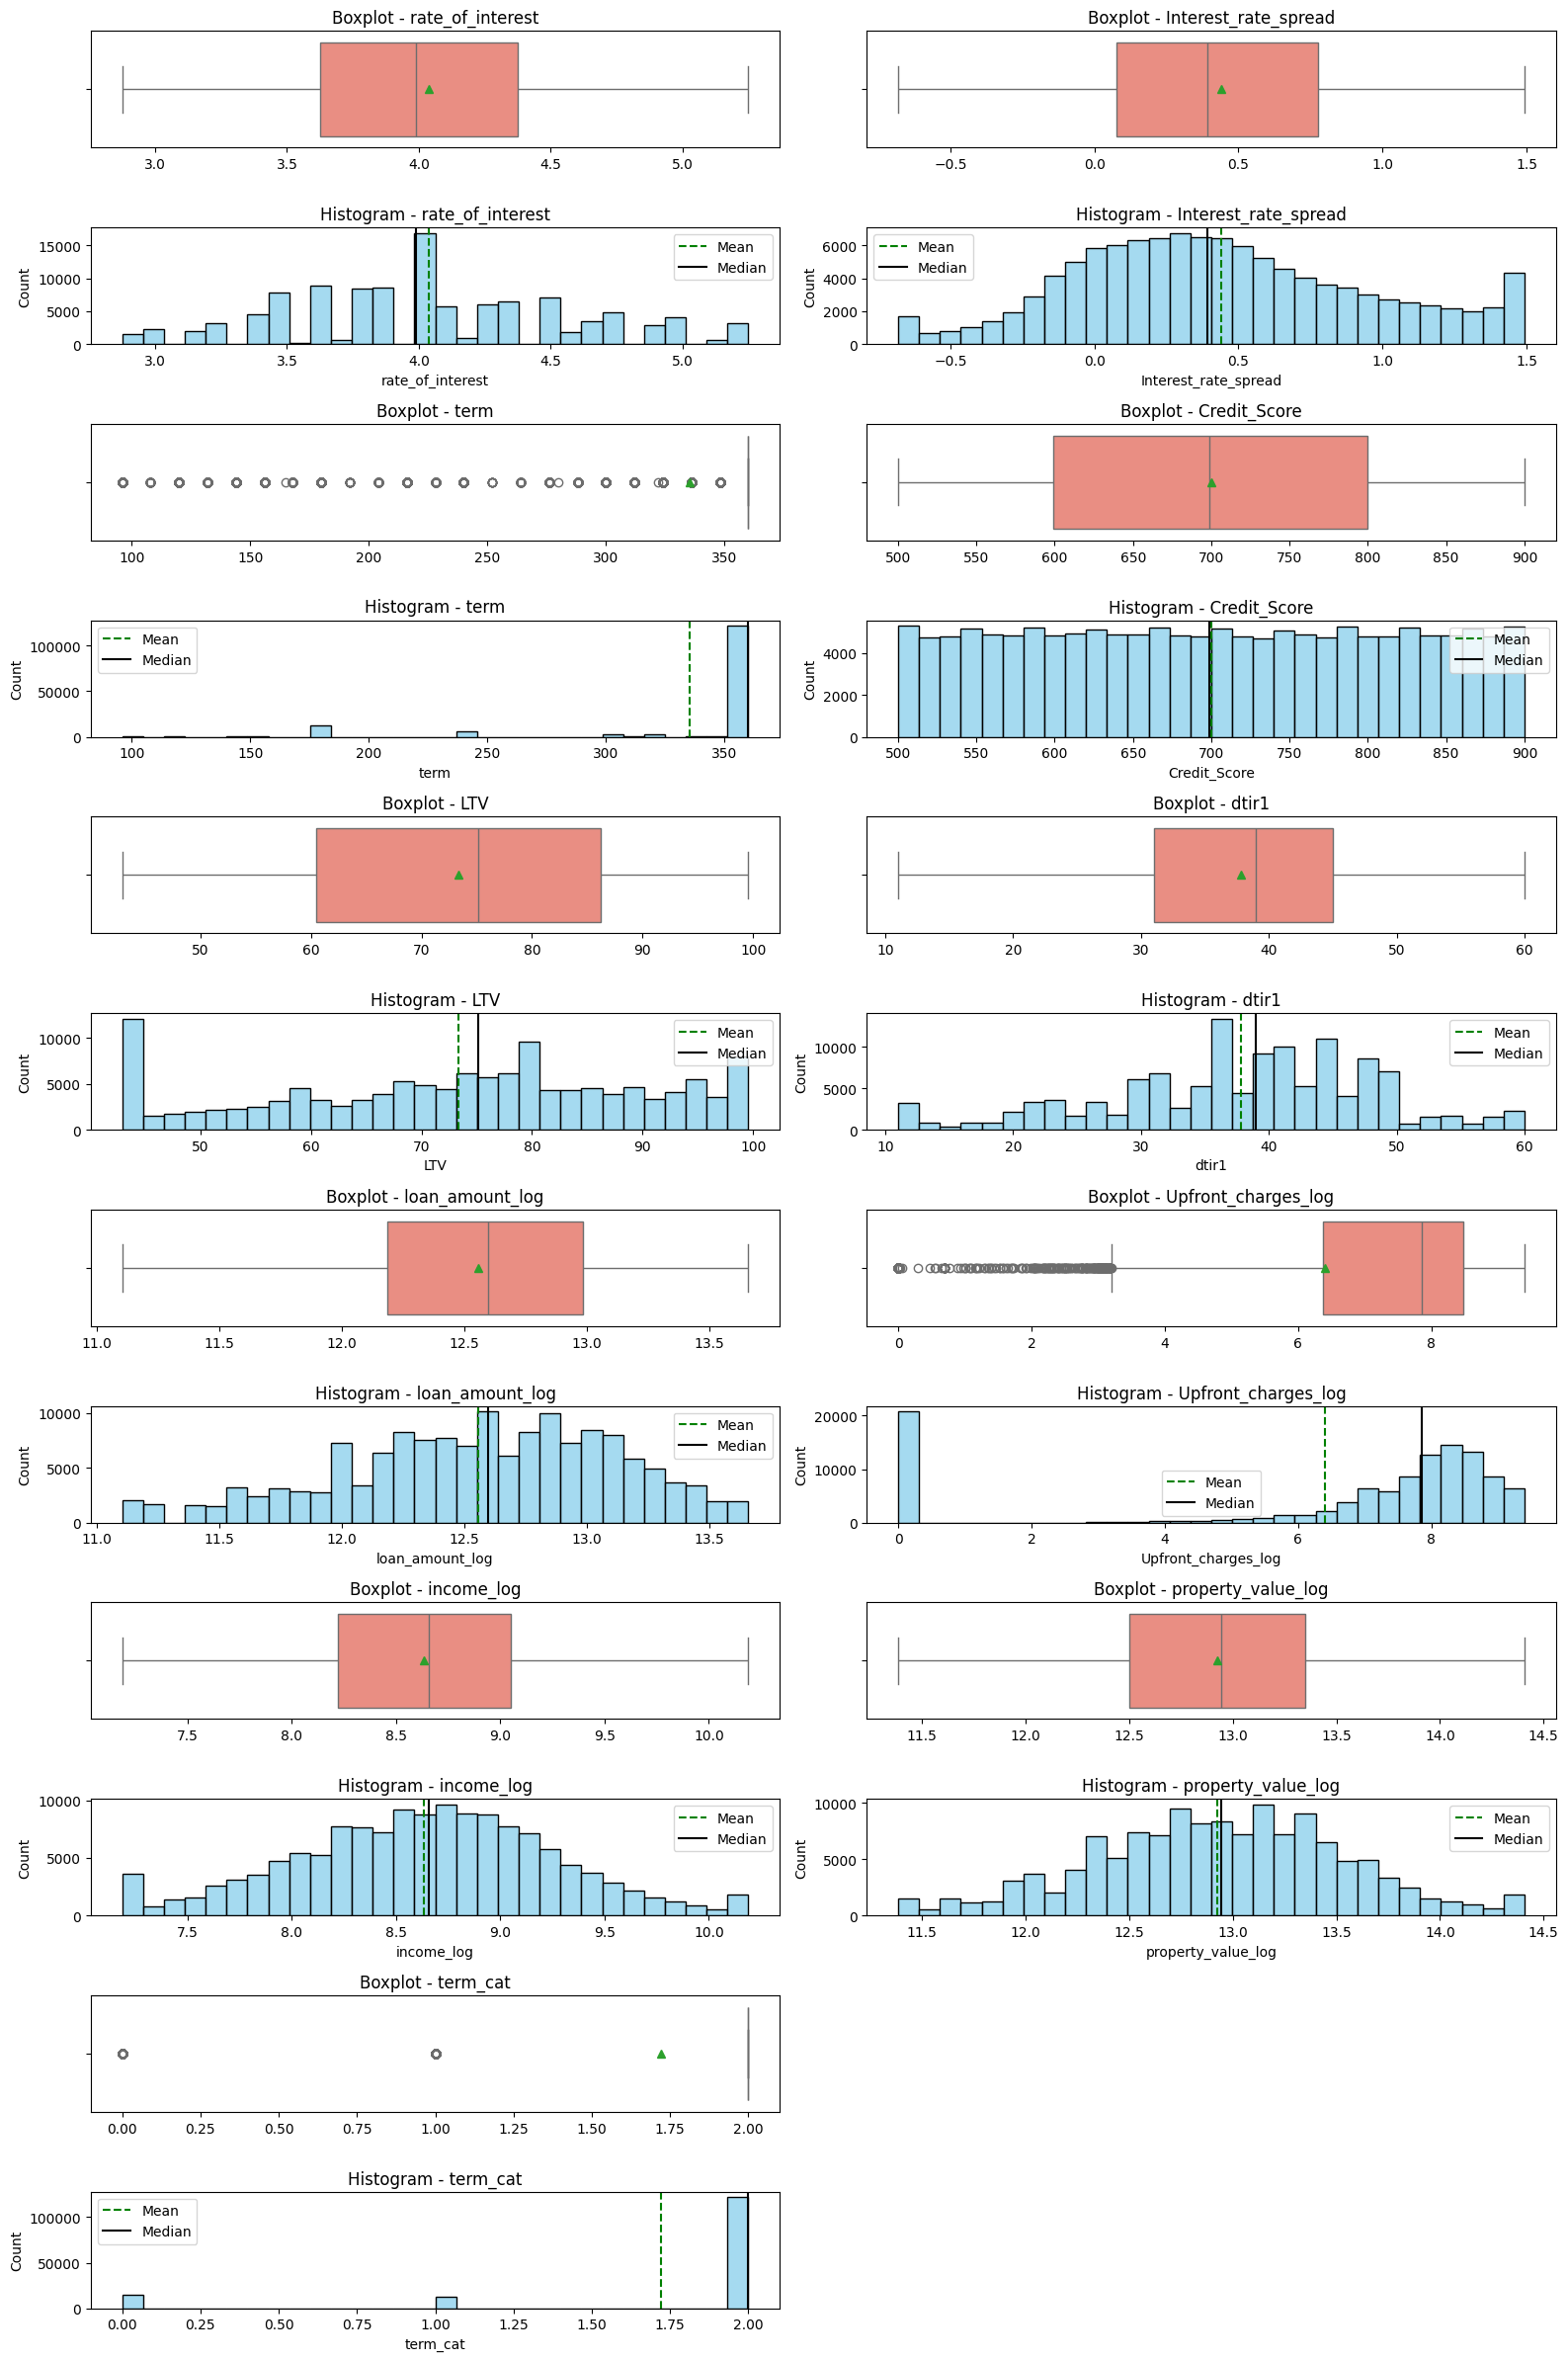

In [69]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
cols_to_exclude = ['ID', 'year', 'Status']
plot_cols = [col for col in numeric_cols if col not in cols_to_exclude]

n_cols = 2
n_rows = (len(plot_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows * 2, n_cols, figsize=(16, n_rows * 4), sharex=False)
axes = axes.reshape(n_rows * 2, n_cols)

for i, col in enumerate(plot_cols):
    row = (i // n_cols) * 2
    col_pos = i % n_cols

    sns.boxplot(
        x=df[col].dropna(),
        ax=axes[row, col_pos],
        showmeans=True,
        color='salmon'
    )
    axes[row, col_pos].set_title(f"Boxplot - {col}")
    axes[row, col_pos].set_xlabel("")

    sns.histplot(
        df[col].dropna(),
        kde=False,
        ax=axes[row + 1, col_pos],
        color='skyblue',
        bins=30
    )
    axes[row + 1, col_pos].axvline(df[col].mean(), color='green', linestyle='--', label='Mean')
    axes[row + 1, col_pos].axvline(df[col].median(), color='black', linestyle='-', label='Median')
    axes[row + 1, col_pos].legend()
    axes[row + 1, col_pos].set_title(f"Histogram - {col}")


total_plots = len(plot_cols)
extra_plots = (n_rows * n_cols) - total_plots
for j in range(extra_plots):
    fig.delaxes(axes[-1, -1 - j])
    fig.delaxes(axes[-2, -1 - j])

plt.tight_layout()
plt.show()


##Handling missing value

In [87]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_info = pd.DataFrame({
    'missing_count': missing,
    'dtype': df[missing.index].dtypes
})

print(missing_info)


                           missing_count    dtype
dtir1                              24121  float64
LTV                                15098  float64
dti_ratio                           9150  float64
income_log                          9150  float64
loan_limit                          3344   object
approv_in_adv                        908   object
age                                  200   object
submission_of_application            200   object
loan_per_age                         200  float64
loan_purpose                         134   object
Neg_ammortization                    121   object
term                                  41  float64


In [88]:
# df=df.dropna(axis=1)
df=df.drop(columns=["ID","year","term_cat",
    "Interest_rate_spread",
    "rate_of_interest",
    "Upfront_charges_log",
    "property_value_log",
    # "LTV",
    # "dtir1",
])

In [89]:

X = df.drop(columns=['Status'])
y = df['Status']

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, stratify=y_train_full, random_state=42
)

numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes(exclude=np.number).columns.tolist()

numeric_cols = [col for col in numeric_cols if col in X_train.columns]
categorical_cols = [col for col in categorical_cols if col in X_train.columns]

In [90]:
class AddMissingIndicatorsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.missing_cols = []

    def fit(self, X, y=None):
        self.missing_cols = [col for col in self.columns if X[col].isna().any()]
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in self.missing_cols:
            X_copy[f"{col}_missing"] = X_copy[col].isna().astype(int)
        return X_copy


In [91]:
class GroupedMeanImputer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.fill_values_ = {}

    def fit(self, X, y):
        df = X.copy()
        df['Status'] = y.values
        self.fill_values_ = {
            col: df.groupby('Status')[col].median().to_dict()
            for col in self.columns
        }
        return self

    def transform(self, X):
        df = X.copy()
        for col in self.columns:
            global_median = df[col].median()
            df[col] = df[col].fillna(global_median)
        return df

In [92]:
class CategoricalImputerWithTarget(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_cols):
        self.categorical_cols = categorical_cols
        self.fill_values = {}

    def fit(self, X, y):
        df = X.copy()
        df['Status'] = y.values
        self.fill_values = {}
        for col in self.categorical_cols:
            mode_per_class = (
                df.groupby('Status')[col]
                .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
                .to_dict()
            )
            self.fill_values[col] = mode_per_class
        return self

    def transform(self, X):
        df = X.copy()
        for col in self.categorical_cols:
            fallback_mode = pd.Series(df[col]).mode().iloc[0] if not pd.Series(df[col]).mode().empty else "Unknown"
            df[col] = df[col].fillna(fallback_mode)
        return df

##Encoding

In [93]:
binary_cols = ["loan_limit", "submission_of_application", "approv_in_adv",
    'open_credit', 'business_or_commercial', 'Neg_ammortization',
    'interest_only', 'lump_sum_payment', 'construction_type',
    'Secured_by', 'co-applicant_credit_type', 'Security_Type'
]

nominal_cols = [
   'Gender', 'loan_type', 'loan_purpose',
    'occupancy_type', 'credit_type', 'Region'
]

ordinal_cols = ['Credit_Worthiness', 'total_units','age']

credit_order = ['l2', 'l1']
units_order = ['1U', '2U', '3U', '4U']
age_order = ['<25', '25-34', '35-44', '45-54', '55-64', '65-74', '>74']

ordinal_categories = {
    'Credit_Worthiness': credit_order,
    'total_units': units_order,
    'age': age_order
}

In [94]:

numeric_pipeline = Pipeline([
    ("add_missing_indicators", AddMissingIndicatorsTransformer(columns=numeric_cols)),
    ("grouped_mean_imputer", GroupedMeanImputer(columns=numeric_cols))
])

binary_pipeline = Pipeline([ # تعبئة في حالة وجود قيم فارغة
    ('cat_imputer', CategoricalImputerWithTarget(categorical_cols=binary_cols)),
    ('encoder', OrdinalEncoder())
])

ordinal_pipeline = Pipeline([
    ('cat_imputer', CategoricalImputerWithTarget(categorical_cols=ordinal_cols)),
    ('encoder', OrdinalEncoder(categories=[ordinal_categories[col] for col in ordinal_cols]))
])

nominal_pipeline = Pipeline([
    ('cat_imputer', CategoricalImputerWithTarget(categorical_cols=nominal_cols)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

categorical_pipeline = Pipeline([
    ('cat_imputer', CategoricalImputerWithTarget(categorical_cols=categorical_cols)),
])


#PipLine

In [95]:
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols),
    ('binary', binary_pipeline, binary_cols),
    ('ordinal', ordinal_pipeline, ordinal_cols),
    ('nominal', nominal_pipeline, nominal_cols),
])

In [96]:
X_train_full_target = X_train.copy()
X_train_full_target['Status'] = y_train

preprocessor.fit(X_train_full_target, y_train)

X_train_ready = preprocessor.transform(X_train_full_target)

X_val_temp = X_val.copy()
X_val_temp['Status'] = y_val
X_val_ready = preprocessor.transform(X_val_temp)

X_test_temp = X_test.copy()
X_test_temp['Status'] = y_test
X_test_ready = preprocessor.transform(X_test_temp)

#Feature

In [104]:
def get_feature_names(column_transformer):
    feature_names = []

    for name, transformer, columns in column_transformer.transformers_:
        if name == 'remainder':
            continue

        if hasattr(transformer, 'named_steps'):
            # في حال كان Pipeline
            last_step = list(transformer.named_steps.values())[-1]
        else:
            last_step = transformer

        # حالة الـ OneHotEncoder
        if isinstance(last_step, OneHotEncoder):
            # استخراج أسماء الفئات لكل عمود
            categories = last_step.categories_
            # لكل عمود، نأخذ اسمه ثم نضيف أسماء الفئات
            for col, cats in zip(columns, categories):
                feature_names.extend([f"{col}_{cat}" for cat in cats])
        elif isinstance(last_step, OrdinalEncoder):
            # لا يضيف أعمدة جديدة، يحتفظ بعمود واحد لكل عمود
            feature_names.extend(columns)
        else:
            # لو محول آخر مثل SimpleImputer أو محولات مخصصة نحتفظ بنفس أسماء الأعمدة
            feature_names.extend(columns)

        # معالجة حالة إضافة أعمدة مؤشرات Missing في numeric_pipeline
        if name == 'num':
            # مؤشرات القيم المفقودة أضيفت بعد الأعمدة الرقمية
            # نبحث عن محول AddMissingIndicatorsTransformer في pipeline
            add_missing_step = transformer.named_steps.get('add_missing_indicators', None)
            if add_missing_step:
                missing_cols = add_missing_step.missing_cols
                for col in missing_cols:
                    feature_names.append(f"{col}_missing")

    return feature_names

# استخدام الدالة للحصول على أسماء الأعمدة



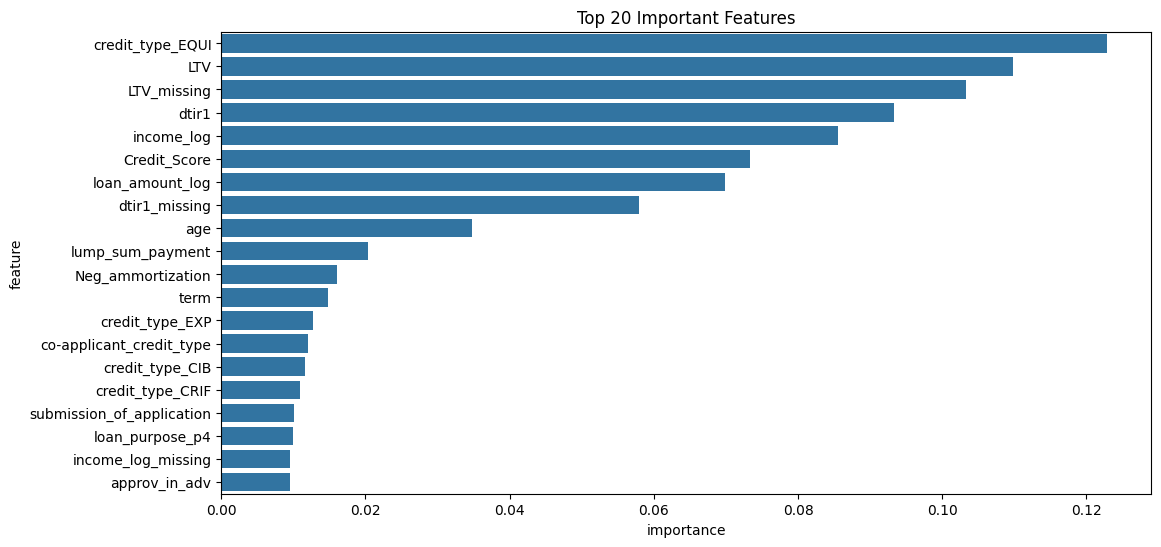

In [30]:
from sklearn.ensemble import RandomForestClassifier
importances_model = RandomForestClassifier(n_estimators=100, random_state=42)
importances_model.fit(X_train_ready, y_train)

importances = importances_model.feature_importances_

# Get feature names after transformation
# استخراج الأسماء الجديدة
feature_names = get_feature_names(preprocessor)

# إنشاء داتا فريم للأهمية
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# # رسم البياني
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df.head(20), x='importance', y='feature')
plt.title('Top 20 Important Features')
plt.show()


In [86]:
df['dti_ratio'] = df['loan_amount_log'] / df['income_log']
df['loan_per_age'] = df['loan_amount_log'] / df['age'].map({
    '<25': 25, '25-34': 30, '35-44': 40, '45-54': 50, '55-64': 60, '65-74': 70, '>74': 75
})

df['high_LTV_flag'] = (df['LTV'] > 0.85).astype(int)

risk_cols = ['Neg_ammortization', 'interest_only', 'lump_sum_payment']
df['risk_score'] = df[risk_cols].apply(lambda x: x.astype('category').cat.codes).sum(axis=1)


# df['age_occupancy'] = df['age'].astype(str) + '_' + df['occupancy_type'].astype(str)

X = df.drop(columns=['Status'])
y = df['Status']


In [32]:
# 🔧 سمة جديدة:
# dti_ratio = loan_amount / income
# (أو استخدم loan_amount_log / income_log لو كنت تستخدم النسخ اللوغاريتمية).

# 📌 السبب:
# تعكس قدرة الشخص على تحمل الدين مقارنةً بدخله — مؤشر مهم جدًا في تقييم الجدارة الائتمانية.
# loan_per_age = loan_amount / age

# 📌 السبب:
# يُظهر عبء الدين حسب العمر، فالشباب الذين يحصلون على قروض ضخمة قد يُعتبرون أكثر مخاطرة.
# 5. مؤشر الشك المالي (Financial Uncertainty Index)
# 🔧 سمة مركبة (تجريبية):
# اجمع بين عدة مؤشرات مخاطرة:

# python
# Copy
# Edit
# uncertainty_index = (LTV > 0.9).astype(int) + (loan_amount_log > threshold) + (income_log < threshold2)
# 📌 السبب:
# هذا المؤشر يُعطي تقييمًا مباشرًا لتراكم المخاطر.
# # 1. Flag إذا كانت LTV مرتفعة
# df['high_LTV_flag'] = (df['LTV'] > 0.85).astype(int)

# # 2. إنشاء مؤشر مخاطرة بناءً على خصائص القرض
# risk_cols = ['Neg_ammortization', 'interest_only', 'lump_sum_payment']
# df['risk_score'] = df[risk_cols].sum(axis=1)

# # 3. إنشاء تفاعل (Interaction) بين العمر ونوع السكن
# df['age_occupancy'] = df['age'].astype(str) + '_' + df['occupancy_type'].astype(str)
# # تحديث القوائم حسب السمات الجديدة
# nominal_cols.append('age_occupancy')  # لأنها فئوية جديدة
# numeric_cols.append('risk_score')    # عددية جديدة
# binary_cols.append('high_LTV_flag')  # ثنائية جديدة
# # تحديث البيانات بعد الإضافة
# df = df.drop(columns=['Status'])  # مؤقتًا لحين التقسيم
# X = df
# y = y  # موجودة من قبل

# # تقسيم جديد
# X_train_full, X_test, y_train_full, y_test = train_test_split(
#     X, y, test_size=0.2, stratify=y, random_state=42
# )

# X_train, X_val, y_train, y_val = train_test_split(
#     X_train_full, y_train_full, test_size=0.2, stratify=y_train_full, random_state=42
# )

# # إعادة بناء الـ preprocessor بنفس الشكل ولكن بعد تحديث القوائم
# preprocessor = ColumnTransformer([
#     ('num', numeric_pipeline, numeric_cols),
#     ('binary', binary_pipeline, binary_cols),
#     ('ordinal', ordinal_pipeline, ordinal_cols),
#     ('nominal', nominal_pipeline, nominal_cols),
# ])

# X_train_full_target = X_train.copy()
# X_train_full_target['Status'] = y_train

# preprocessor.fit(X_train_full_target, y_train)

# X_train_ready = preprocessor.transform(X_train_full_target)

# X_val_temp = X_val.copy()
# X_val_temp['Status'] = y_val
# X_val_ready = preprocessor.transform(X_val_temp)

# X_test_temp = X_test.copy()
# X_test_temp['Status'] = y_test
# X_test_ready = preprocessor.transform(X_test_temp)


#Modeling

##D

In [85]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# without new feature
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)

# إنشاء نموذج Decision Tree
tree_model = DecisionTreeClassifier(
    criterion='gini',          # يمكنك تغييره إلى 'entropy'
    max_depth=6,               # عمق الشجرة (يمكنك التعديل حسب الأداء)
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)

# تدريب النموذج
tree_model.fit(X_train_resampled, y_train_resampled)

# التنبؤ على بيانات التحقق (validation set)
y_pred = tree_model.predict(X_val_ready)

# تقييم النموذج
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))


Precision: 0.6735
Recall: 0.5624
F1 Score: 0.613

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89     17926
           1       0.67      0.56      0.61      5862

    accuracy                           0.82     23788
   macro avg       0.77      0.74      0.75     23788
weighted avg       0.82      0.82      0.82     23788



In [80]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# تطبيق SMOTE على بيانات التدريب
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)

# إنشاء نموذج Decision Tree
tree_model = DecisionTreeClassifier(
    criterion='gini',          # يمكنك تغييره إلى 'entropy'
    max_depth=6,               # عمق الشجرة (يمكنك التعديل حسب الأداء)
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)

# تدريب النموذج
tree_model.fit(X_train_resampled, y_train_resampled)

# التنبؤ على بيانات التحقق (validation set)
y_pred = tree_model.predict(X_val_ready)

# تقييم النموذج
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))


Precision: 0.8832
Recall: 0.521
F1 Score: 0.6554

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     17926
           1       0.88      0.52      0.66      5862

    accuracy                           0.86     23788
   macro avg       0.87      0.75      0.79     23788
weighted avg       0.87      0.86      0.85     23788



In [97]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_ready, y_train)

# إنشاء نموذج Decision Tree
tree_model = DecisionTreeClassifier(
    criterion='gini',          # يمكنك تغييره إلى 'entropy'
    max_depth=6,               # عمق الشجرة (يمكنك التعديل حسب الأداء)
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)

# تدريب النموذج
tree_model.fit(X_train_resampled, y_train_resampled)

# التنبؤ على بيانات التحقق (validation set)
y_pred = tree_model.predict(X_val_ready)

# تقييم النموذج
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Precision: 0.9379
Recall: 0.4867
F1 Score: 0.6408

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     17926
           1       0.94      0.49      0.64      5862

    accuracy                           0.87     23788
   macro avg       0.90      0.74      0.78     23788
weighted avg       0.88      0.87      0.85     23788



In [99]:
from sklearn.utils import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)
weights = dict(zip(np.unique(y_train), class_weights))

pos_weight = class_weights[1] / class_weights[0]


tree_model = DecisionTreeClassifier(
    criterion='gini',          # يمكنك تغييره إلى 'entropy'
    max_depth=6,               # عمق الشجرة (يمكنك التعديل حسب الأداء)
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=42
)

# تدريب النموذج
tree_model.fit(X_train_resampled, y_train_resampled)

# التنبؤ على بيانات التحقق (validation set)
y_pred = tree_model.predict(X_val_ready)

# تقييم النموذج
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Precision: 0.9379
Recall: 0.4867
F1 Score: 0.6408

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     17926
           1       0.94      0.49      0.64      5862

    accuracy                           0.87     23788
   macro avg       0.90      0.74      0.78     23788
weighted avg       0.88      0.87      0.85     23788



##Gussian naine bais

In [98]:
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_ready, y_train)

model = GaussianNB()
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_val_ready)

# حساب المقاييس
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# الطباعة
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))



Precision: 0.9551
Recall: 0.4463
F1 Score: 0.6083


##XGB

In [80]:
def plot_confusion_matrix_and_pr_auc(y_true, y_pred, y_scores):

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    pr_auc = average_precision_score(y_true, y_scores)
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    plt.figure(figsize=(6,4))
    plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.2f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.grid(True)
    plt.show()
    print(f"PR AUC Score: {pr_auc:.4f}")


In [81]:
def plot_learning_curves(results):
    logloss_train = results['validation_0']['logloss']
    logloss_val = results['validation_1']['logloss']

    error_train = results['validation_0'].get('error')
    error_val = results['validation_1'].get('error')

    epochs = range(1, len(logloss_train) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, logloss_train, label='Train Loss')
    plt.plot(epochs, logloss_val, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Log Loss')
    plt.title('Log Loss Over Epochs')
    plt.legend()

    if error_train and error_val:
        plt.subplot(1, 2, 2)
        plt.plot(epochs, error_train, label='Train Error')
        plt.plot(epochs, error_val, label='Validation Error')
        plt.xlabel('Epoch')
        plt.ylabel('Error')
        plt.title('Classification Error Over Epochs')
        plt.legend()

    plt.tight_layout()
    plt.show()


In [82]:
def print_metrics(y_true, y_pred):
    """حساب وطباعه precision, recall, f1"""
    print("Classification Report:")
    print(classification_report(y_true, y_pred, digits=4))
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")


In [83]:
#without new feature
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)

model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric=['logloss', 'error'],
    random_state=42,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0,
    reg_lambda=1,
    min_child_weight=1
)

eval_set = [(X_train_resampled, y_train_resampled), (X_val_ready, y_val)]

model = model.fit(
    X_train_resampled,
    y_train_resampled,
    eval_set=eval_set,
    verbose=False
)

results = model.evals_result()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:40:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0     0.8853    0.9843    0.9322     17926
           1     0.9269    0.6100    0.7358      5862

    accuracy                         0.8920     23788
   macro avg     0.9061    0.7971    0.8340     23788
weighted avg     0.8956    0.8920    0.8838     23788

Precision: 0.9269
Recall: 0.6100
F1 Score: 0.7358


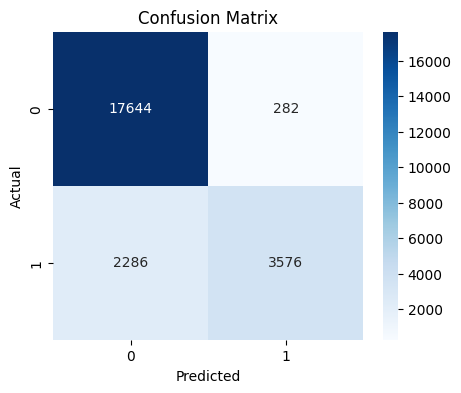

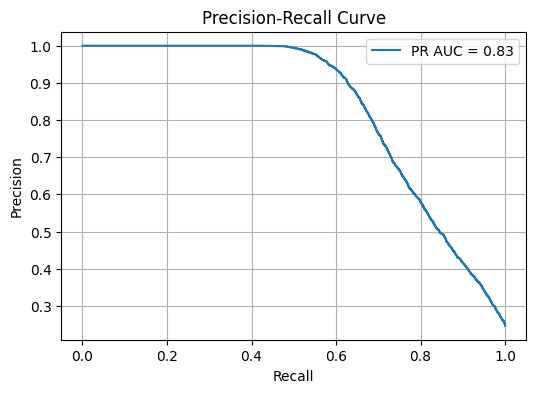

PR AUC Score: 0.8329


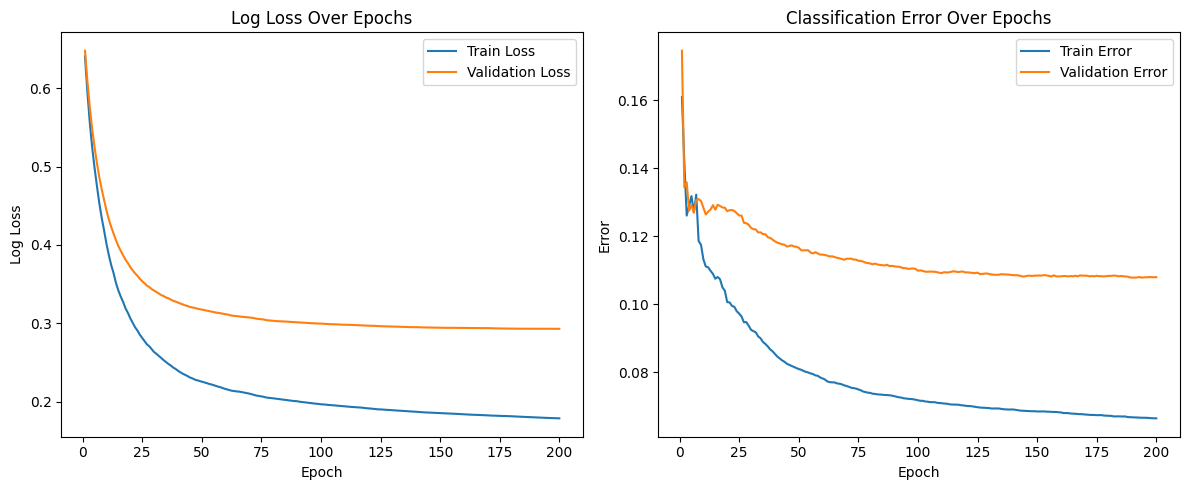

In [84]:
y_val_pred = model.predict(X_val_ready)
y_val_scores = model.predict_proba(X_val_ready)[:,1]
print_metrics(y_val, y_val_pred)
plot_confusion_matrix_and_pr_auc(y_val, y_val_pred, y_val_scores)
plot_learning_curves(results)


In [144]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)

model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric=['logloss', 'error'],
    random_state=42,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0,
    reg_lambda=1,
    min_child_weight=1
)

eval_set = [(X_train_resampled, y_train_resampled), (X_val_ready, y_val)]

model = model.fit(
    X_train_resampled,
    y_train_resampled,
    eval_set=eval_set,
    verbose=False
)

results = model.evals_result()

Classification Report:
              precision    recall  f1-score   support

           0     0.8862    0.9835    0.9323     17926
           1     0.9240    0.6138    0.7376      5862

    accuracy                         0.8924     23788
   macro avg     0.9051    0.7986    0.8350     23788
weighted avg     0.8955    0.8924    0.8843     23788

Precision: 0.9240
Recall: 0.6138
F1 Score: 0.7376


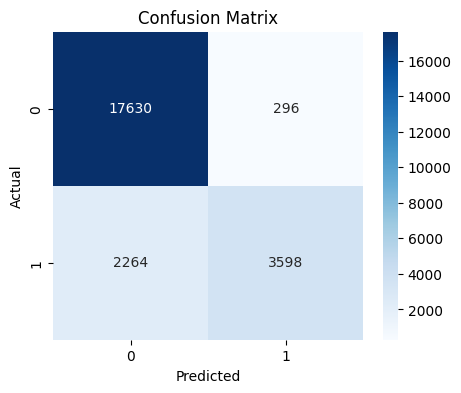

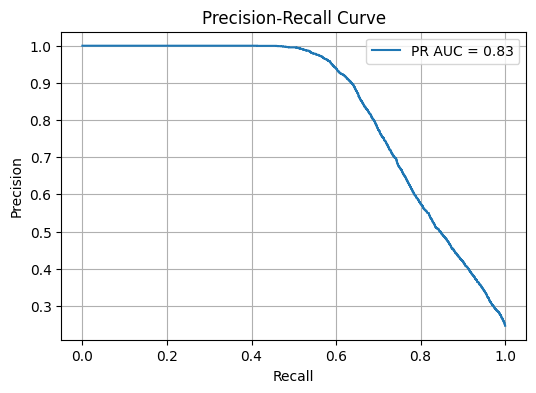

PR AUC Score: 0.8349


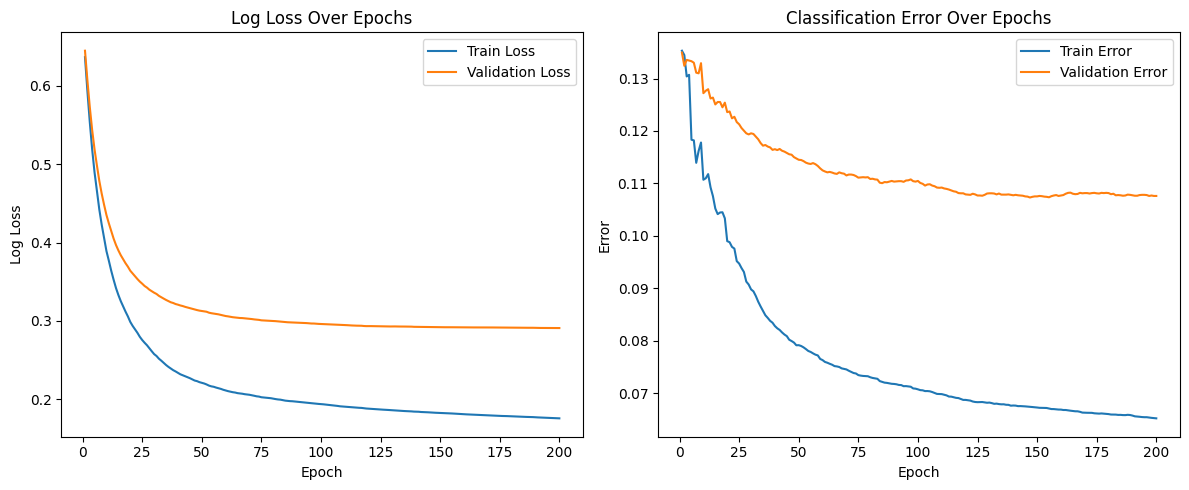

In [148]:
y_val_pred = model.predict(X_val_ready)
y_val_scores = model.predict_proba(X_val_ready)[:,1]
print_metrics(y_val, y_val_pred)
plot_confusion_matrix_and_pr_auc(y_val, y_val_pred, y_val_scores)
plot_learning_curves(results)


In [149]:

pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('xgb', xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ))
])

param_dist = {
    'xgb__n_estimators': [100, 150, 200, 300],
    'xgb__max_depth': [3, 5, 6, 8],
    'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'xgb__subsample': [0.6, 0.8, 1.0],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0],
    'xgb__min_child_weight': [1, 3, 5],
    'xgb__reg_alpha': [0, 0.01, 0.1],
    'xgb__reg_lambda': [1, 1.5, 2],
}

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=30,
    scoring='average_precision',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_ready, y_train)

print("أفضل معاملات:")
print(random_search.best_params_)

# أفضل نموذج
best_model = random_search.best_estimator_


Fitting 3 folds for each of 30 candidates, totalling 90 fits
أفضل معاملات:
{'xgb__subsample': 0.8, 'xgb__reg_lambda': 1, 'xgb__reg_alpha': 0.01, 'xgb__n_estimators': 150, 'xgb__min_child_weight': 3, 'xgb__max_depth': 6, 'xgb__learning_rate': 0.1, 'xgb__colsample_bytree': 0.6}


In [150]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)

model = xgb.XGBClassifier(
    n_estimators=150,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric=['logloss', 'error'],
    random_state=42,
    subsample=0.8,
    colsample_bytree=0.6,
    reg_alpha=0.01,
    reg_lambda=1,
    min_child_weight=3
)

eval_set = [(X_train_resampled, y_train_resampled), (X_val_ready, y_val)]

model = model.fit(
    X_train_resampled,
    y_train_resampled,
    eval_set=eval_set,
    verbose=False
)

results = model.evals_result()

Classification Report:
              precision    recall  f1-score   support

           0     0.8849    0.9861    0.9327     17926
           1     0.9344    0.6076    0.7364      5862

    accuracy                         0.8928     23788
   macro avg     0.9096    0.7968    0.8346     23788
weighted avg     0.8971    0.8928    0.8843     23788

Precision: 0.9344
Recall: 0.6076
F1 Score: 0.7364


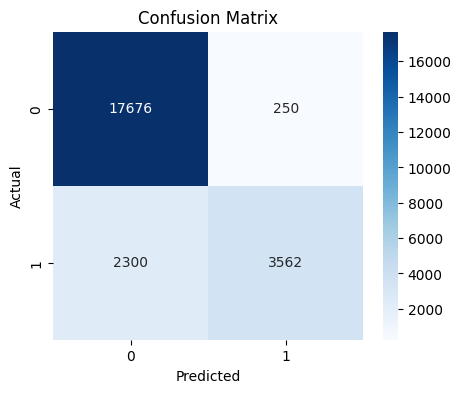

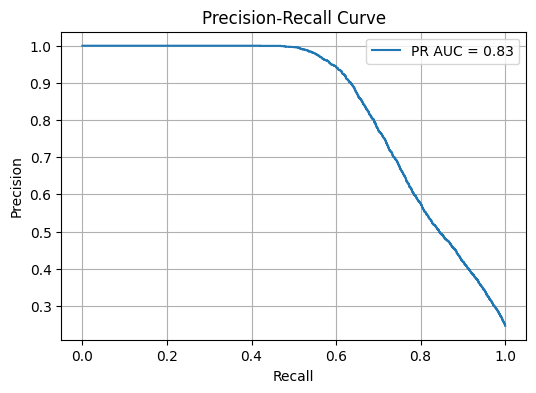

PR AUC Score: 0.8349


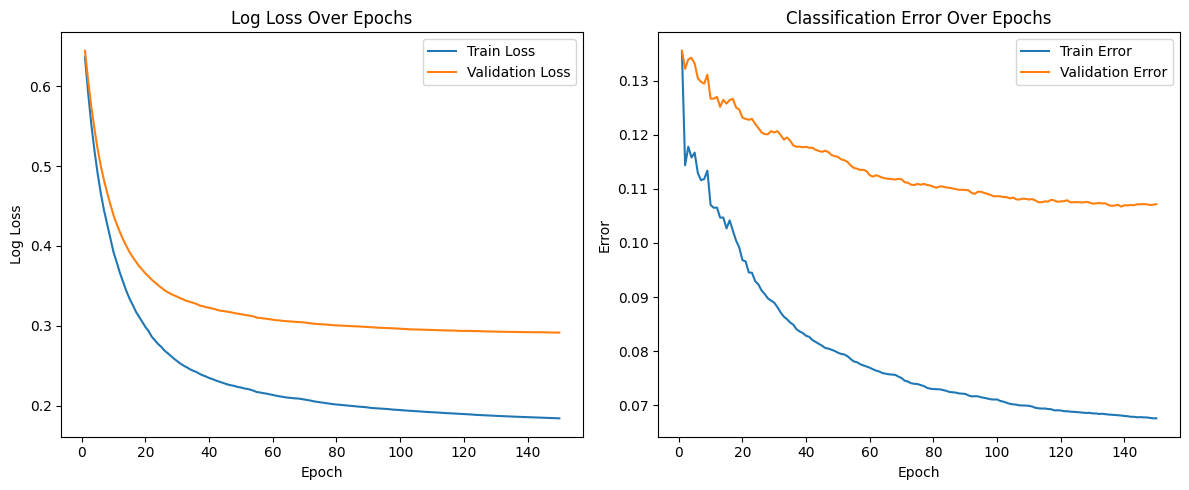

In [151]:
y_val_pred = model.predict(X_val_ready)
y_val_scores = model.predict_proba(X_val_ready)[:,1]
print_metrics(y_val, y_val_pred)
plot_confusion_matrix_and_pr_auc(y_val, y_val_pred, y_val_scores)
plot_learning_curves(results)


In [75]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_ready, y_train)

model = xgb.XGBClassifier(
    n_estimators=150,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric=['logloss', 'error'],
    random_state=42,
    subsample=0.8,
    colsample_bytree=0.6,
    reg_alpha=0.01,
    reg_lambda=1,
    min_child_weight=3
)

eval_set = [(X_train_resampled, y_train_resampled), (X_val_ready, y_val)]

model = model.fit(
    X_train_resampled,
    y_train_resampled,
    eval_set=eval_set,
    verbose=False
)

results = model.evals_result()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0     0.8855    0.9841    0.9322     17926
           1     0.9263    0.6109    0.7362      5862

    accuracy                         0.8921     23788
   macro avg     0.9059    0.7975    0.8342     23788
weighted avg     0.8956    0.8921    0.8839     23788

Precision: 0.9263
Recall: 0.6109
F1 Score: 0.7362


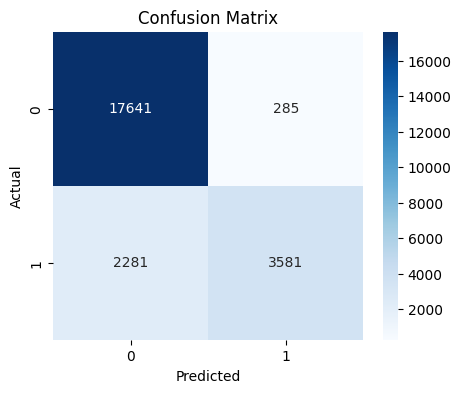

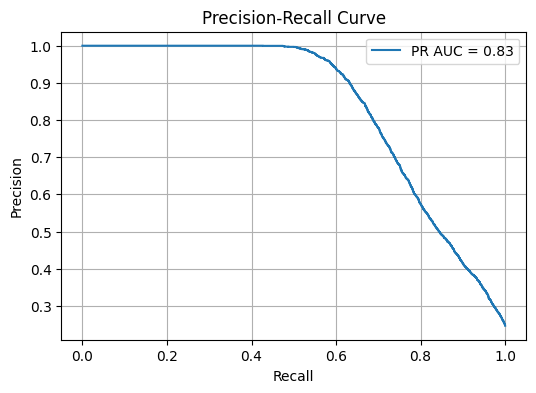

PR AUC Score: 0.8349


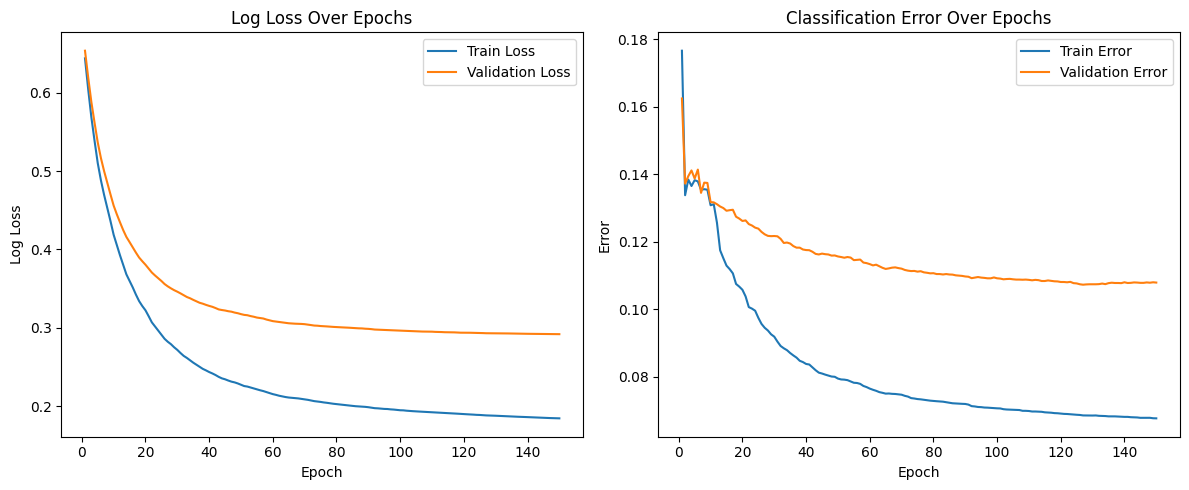

In [76]:
y_val_pred = model.predict(X_val_ready)
y_val_scores = model.predict_proba(X_val_ready)[:,1]
print_metrics(y_val, y_val_pred)
plot_confusion_matrix_and_pr_auc(y_val, y_val_pred, y_val_scores)
plot_learning_curves(results)


In [131]:
from sklearn.utils import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)
weights = dict(zip(np.unique(y_train), class_weights))

pos_weight = class_weights[1] / class_weights[0]

model = xgb.XGBClassifier(
    n_estimators=150,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric=['logloss', 'error'],
    random_state=42,
    subsample=0.8,
    colsample_bytree=0.6,
    reg_alpha=0.01,
    reg_lambda=1,
    min_child_weight=3,
    scale_pos_weight=pos_weight ,
)

eval_set = [(X_train_resampled, y_train_resampled), (X_val_ready, y_val)]

model = model.fit(
    X_train_resampled,
    y_train_resampled,
    eval_set=eval_set,
    verbose=False
)

results = model.evals_result()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:01:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0     0.9088    0.9132    0.9110     17926
           1     0.7306    0.7197    0.7251      5862

    accuracy                         0.8655     23788
   macro avg     0.8197    0.8165    0.8180     23788
weighted avg     0.8649    0.8655    0.8652     23788

Precision: 0.7306
Recall: 0.7197
F1 Score: 0.7251


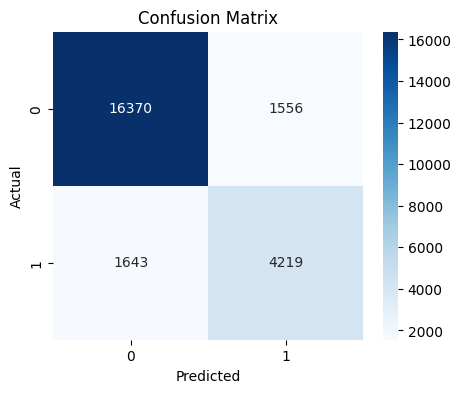

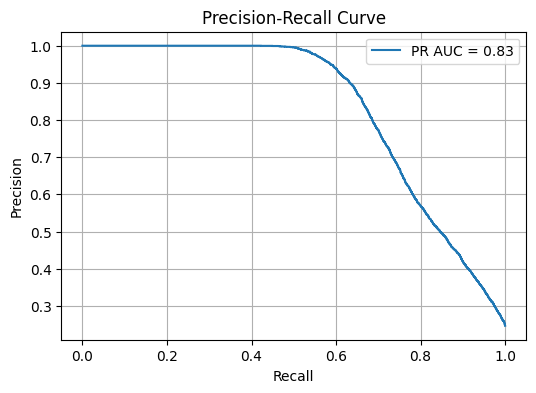

PR AUC Score: 0.8339


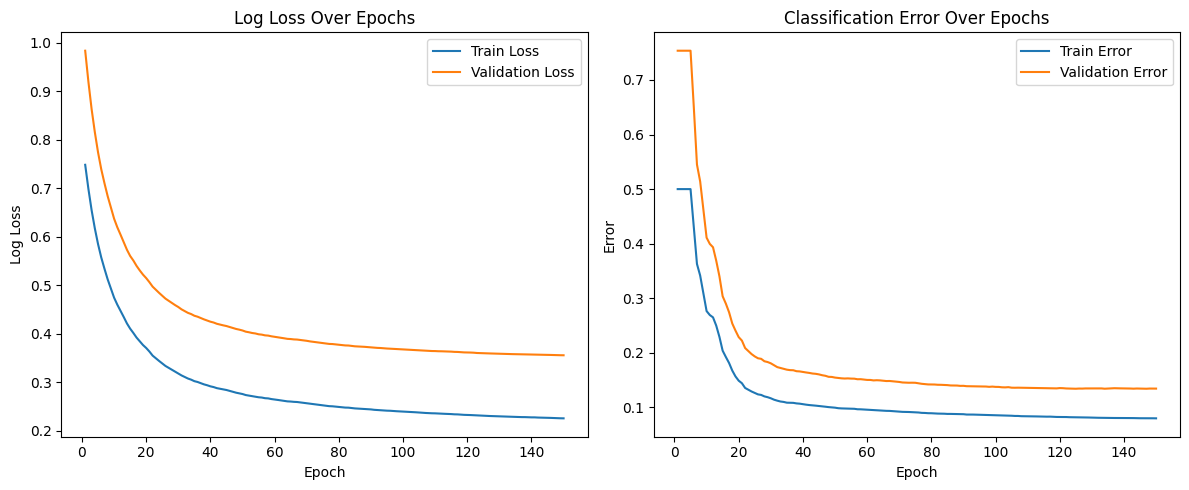

In [132]:
y_val_pred = model.predict(X_val_ready)
y_val_scores = model.predict_proba(X_val_ready)[:,1]
print_metrics(y_val, y_val_pred)
plot_confusion_matrix_and_pr_auc(y_val, y_val_pred, y_val_scores)
plot_learning_curves(results)


In [110]:
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import numpy as np


def objective(trial):

    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 0.1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.5, 2.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []

    for train_idx, val_idx in skf.split(X_train_ready_df, y_train):
        X_tr, X_val = X_train_ready_df.iloc[train_idx], X_train_ready_df.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        smote = SMOTE(random_state=42)
        X_tr_res, y_tr_res = smote.fit_resample(X_tr, y_tr)

        model = XGBClassifier(**params)
        model.fit(X_tr_res, y_tr_res)

        y_pred = model.predict(X_val)
        score = f1_score(y_val, y_pred)
        f1_scores.append(score)

    return np.mean(f1_scores)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best hyperparameters:")
print(study.best_params)
print(f"Best F1 Score: {study.best_value:.4f}")


Best hyperparameters:
{'n_estimators': 228, 'max_depth': 5, 'learning_rate': 0.19709894598123304, 'subsample': 0.9743707499811952, 'colsample_bytree': 0.803848298767506, 'reg_alpha': 0.09524078869899476, 'reg_lambda': 1.559260943148258, 'min_child_weight': 1}
Best F1 Score: 0.7480


In [111]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)

model = xgb.XGBClassifier(
    n_estimators=228,
    max_depth=5,
    learning_rate=0.19709894598123304,
    use_label_encoder=False,
    eval_metric=['logloss', 'error'],
    random_state=42,
    subsample=0.9743707499811952,
    colsample_bytree=0.803848298767506,
    reg_alpha=0.09524078869899476,
    reg_lambda=1.559260943148258,
    min_child_weight=1
)

eval_set = [(X_train_resampled, y_train_resampled), (X_val_ready, y_val)]

model = model.fit(
    X_train_resampled,
    y_train_resampled,
    eval_set=eval_set,
    verbose=False
)

results = model.evals_result()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:29:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0     0.8886    0.9825    0.9332     17926
           1     0.9211    0.6232    0.7434      5862

    accuracy                         0.8940     23788
   macro avg     0.9048    0.8029    0.8383     23788
weighted avg     0.8966    0.8940    0.8864     23788

Precision: 0.9211
Recall: 0.6232
F1 Score: 0.7434


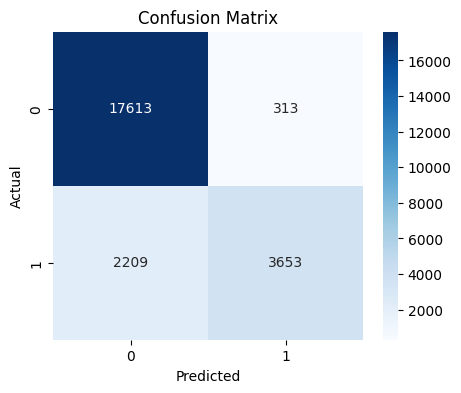

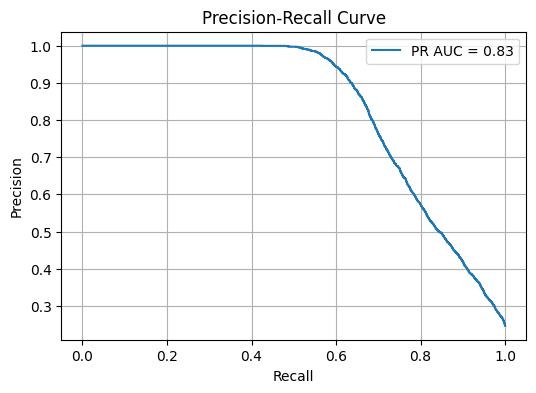

PR AUC Score: 0.8343


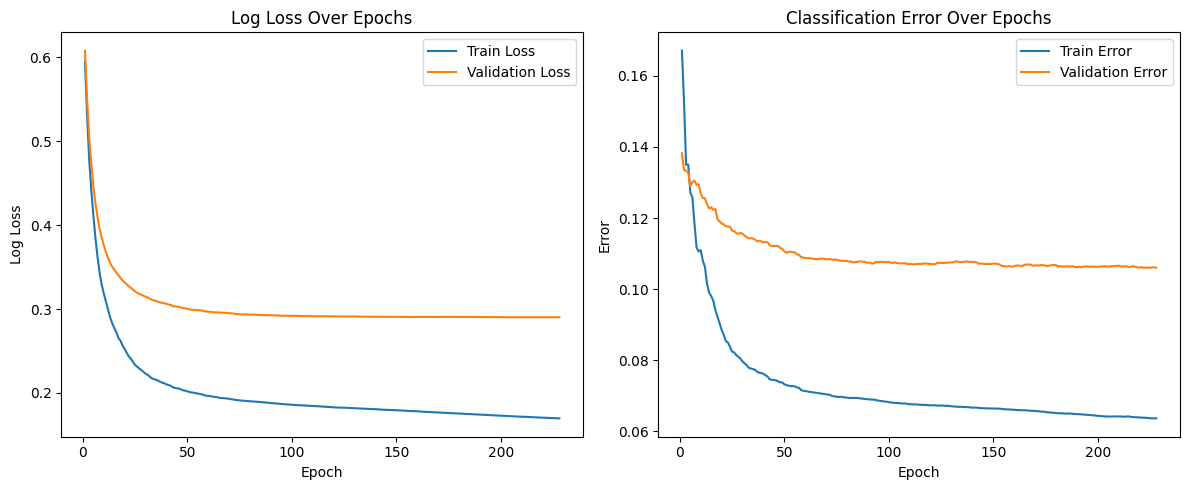

In [112]:
y_val_pred = model.predict(X_val_ready)
y_val_scores = model.predict_proba(X_val_ready)[:,1]
print_metrics(y_val, y_val_pred)
plot_confusion_matrix_and_pr_auc(y_val, y_val_pred, y_val_scores)
plot_learning_curves(results)


In [136]:
import optuna
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
import xgboost as xgb


feature_names_after_transform = get_feature_names(preprocessor)
X_train_ready_df = pd.DataFrame(X_train_ready, columns=feature_names_after_transform)
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)
weights = dict(zip(np.unique(y_train), class_weights))

pos_weight = class_weights[1] / class_weights[0]

def objective(trial):
    # المعاملات التي نريد ضبطها
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'logloss',
        'scale_pos_weight': pos_weight  # <-- توازن الفئات
    }

    # Cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []

    for train_idx, val_idx in skf.split(X_train_ready, y_train):
        X_tr, X_val = X_train_ready_df.iloc[train_idx], X_train_ready_df.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model = xgb.XGBClassifier(**params)
        model.fit(X_tr, y_tr)

        y_pred = model.predict(X_val)
        f1 = f1_score(y_val, y_pred)
        f1_scores.append(f1)

    return np.mean(f1_scores)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("أفضل المعاملات:")
print(study.best_params)


أفضل المعاملات:
{'n_estimators': 276, 'max_depth': 10, 'learning_rate': 0.03522370842860682, 'subsample': 0.8294311972938809, 'colsample_bytree': 0.5991475016220844, 'reg_alpha': 0.4863521561020574, 'reg_lambda': 0.5259893626639738, 'min_child_weight': 1}


In [134]:
from sklearn.utils import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)
weights = dict(zip(np.unique(y_train), class_weights))

pos_weight = class_weights[1] / class_weights[0]

model = xgb.XGBClassifier(
    n_estimators=276,
    max_depth=10,
    learning_rate=0.03522370842860682,
    use_label_encoder=False,
    eval_metric=['logloss', 'error'],
    random_state=42,
    subsample=0.8294311972938809,
    colsample_bytree=0.5991475016220844,
    reg_alpha=0.4863521561020574,
    reg_lambda=0.5259893626639738,
    min_child_weight=1,
    scale_pos_weight=pos_weight ,
)

eval_set = [(X_train_resampled, y_train_resampled), (X_val_ready, y_val)]

model = model.fit(
    X_train_resampled,
    y_train_resampled,
    eval_set=eval_set,
    verbose=False
)

results = model.evals_result()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:28:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0     0.9061    0.9272    0.9165     17926
           1     0.7603    0.7062    0.7323      5862

    accuracy                         0.8728     23788
   macro avg     0.8332    0.8167    0.8244     23788
weighted avg     0.8702    0.8728    0.8711     23788

Precision: 0.7603
Recall: 0.7062
F1 Score: 0.7323


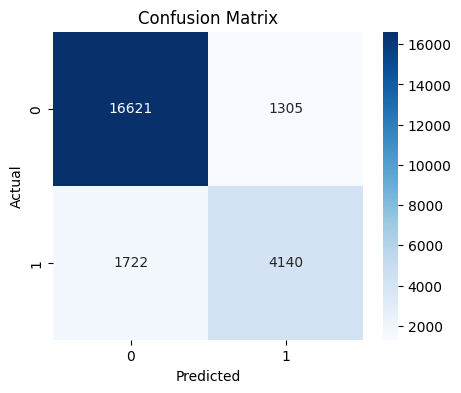

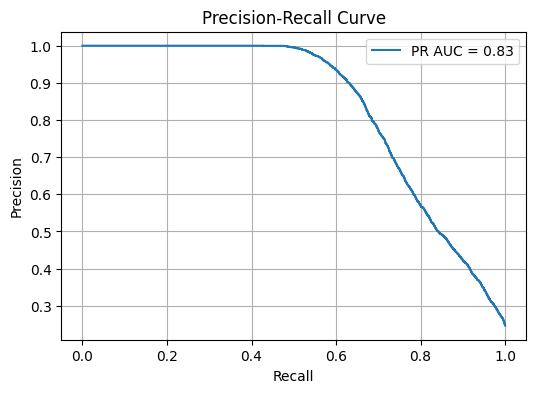

PR AUC Score: 0.8341


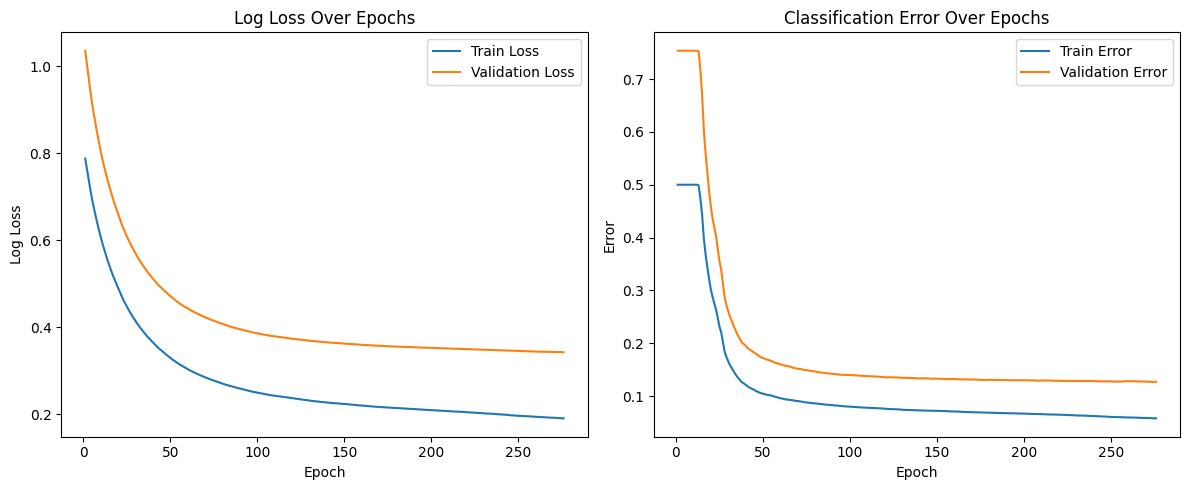

In [135]:
y_val_pred = model.predict(X_val_ready)
y_val_scores = model.predict_proba(X_val_ready)[:,1]
print_metrics(y_val, y_val_pred)
plot_confusion_matrix_and_pr_auc(y_val, y_val_pred, y_val_scores)
plot_learning_curves(results)


##Catboost

Classification Report:
              precision    recall  f1-score   support

           0     0.8851    0.9860    0.9328     17926
           1     0.9343    0.6087    0.7371      5862

    accuracy                         0.8930     23788
   macro avg     0.9097    0.7973    0.8350     23788
weighted avg     0.8972    0.8930    0.8846     23788

Precision: 0.9343
Recall: 0.6087
F1 Score: 0.7371


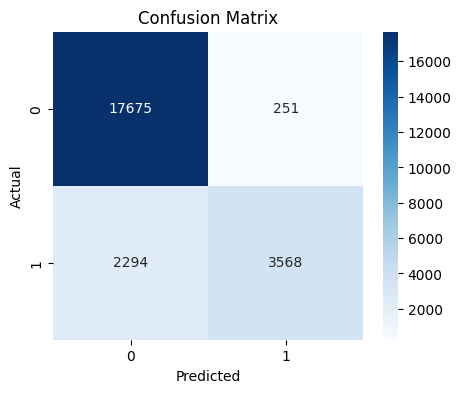

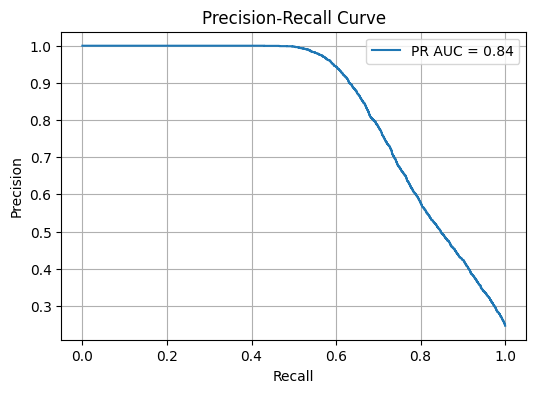

PR AUC Score: 0.8359


In [117]:
from catboost import CatBoostClassifier, Pool
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)

model = CatBoostClassifier(
    iterations=200,
    depth=6,
    learning_rate=0.1,
    random_seed=42,
    l2_leaf_reg=1,
    eval_metric='F1',
    verbose=False,
    task_type='CPU'
)

eval_pool = Pool(X_val_ready, y_val)

model.fit(
    X_train_resampled, y_train_resampled,
    eval_set=eval_pool,
    use_best_model=True
)

y_val_pred = model.predict(X_val_ready)
y_val_scores = model.predict_proba(X_val_ready)[:, 1]

print_metrics(y_val, y_val_pred)
plot_confusion_matrix_and_pr_auc(y_val, y_val_pred, y_val_scores)


In [120]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score


feature_names_after_transform = get_feature_names(preprocessor)


X_train_ready_df = pd.DataFrame(X_train_ready, columns=feature_names_after_transform)


def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 300),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-2, 10.0, log=True),
        'random_seed': 42,
        'eval_metric': 'F1',
        'verbose': False,
        'task_type': 'CPU'
    }

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    f1_scores = []

    for train_idx, val_idx in skf.split(X_train_ready, y_train):
        X_tr, X_val = X_train_ready_df.iloc[train_idx], X_train_ready_df.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        smote = SMOTE(random_state=42)
        X_tr_res, y_tr_res = smote.fit_resample(X_tr, y_tr)

        model = CatBoostClassifier(**params)
        model.fit(X_tr_res, y_tr_res)

        y_pred = model.predict(X_val)
        f1 = f1_score(y_val, y_pred)
        f1_scores.append(f1)

    return np.mean(f1_scores)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("أفضل معاملات:")
print(study.best_params)



[I 2025-07-12 00:52:21,978] A new study created in memory with name: no-name-5eb89494-4a4e-4b10-8c67-327715bbf8ef
[I 2025-07-12 00:53:09,366] Trial 0 finished with value: 0.7427671580947887 and parameters: {'iterations': 232, 'depth': 7, 'learning_rate': 0.29662148320763915, 'l2_leaf_reg': 0.5385655526829649}. Best is trial 0 with value: 0.7427671580947887.
[I 2025-07-12 00:53:38,515] Trial 1 finished with value: 0.7070082948990964 and parameters: {'iterations': 107, 'depth': 8, 'learning_rate': 0.01858979549170888, 'l2_leaf_reg': 0.22485498264196288}. Best is trial 0 with value: 0.7427671580947887.
[I 2025-07-12 00:54:25,305] Trial 2 finished with value: 0.7391249841560494 and parameters: {'iterations': 188, 'depth': 8, 'learning_rate': 0.19334429519185262, 'l2_leaf_reg': 0.12142949696169988}. Best is trial 0 with value: 0.7427671580947887.
[I 2025-07-12 00:54:42,513] Trial 3 finished with value: 0.6758984808684027 and parameters: {'iterations': 106, 'depth': 5, 'learning_rate': 0.020

أفضل معاملات:
{'iterations': 276, 'depth': 7, 'learning_rate': 0.12317377165241164, 'l2_leaf_reg': 2.312505969430195}


Classification Report:
              precision    recall  f1-score   support

           0     0.8868    0.9840    0.9329     17926
           1     0.9264    0.6160    0.7400      5862

    accuracy                         0.8933     23788
   macro avg     0.9066    0.8000    0.8364     23788
weighted avg     0.8966    0.8933    0.8853     23788

Precision: 0.9264
Recall: 0.6160
F1 Score: 0.7400


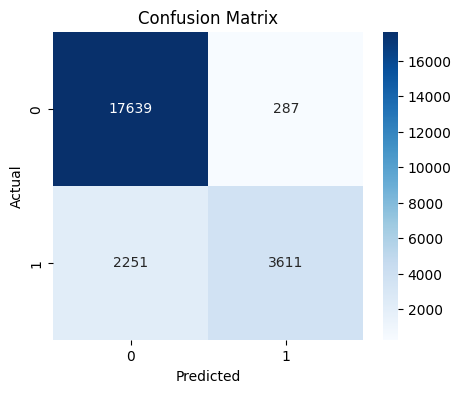

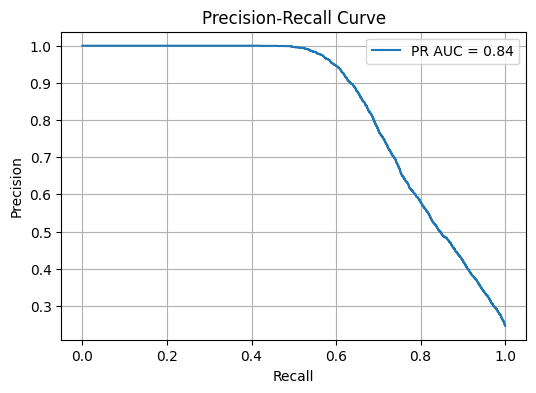

PR AUC Score: 0.8356


In [121]:
from catboost import CatBoostClassifier, Pool
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)

model = CatBoostClassifier(
    iterations=276,
    depth=7,
    learning_rate=0.12317377165241164,
    random_seed=42,
    l2_leaf_reg=2.312505969430195,
    eval_metric='F1',
    verbose=False,
    task_type='CPU'
)

eval_pool = Pool(X_val_ready, y_val)

model.fit(
    X_train_resampled, y_train_resampled,
    eval_set=eval_pool,
    use_best_model=True
)

y_val_pred = model.predict(X_val_ready)
y_val_scores = model.predict_proba(X_val_ready)[:, 1]

print_metrics(y_val, y_val_pred)
plot_confusion_matrix_and_pr_auc(y_val, y_val_pred, y_val_scores)


##LightGBM

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 71699, number of negative: 71699
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.060164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12255
[LightGBM] [Info] Number of data points in the train set: 143398, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Baseline LightGBM Metrics:
Accuracy:  0.8928
Precision: 0.9224
Recall:    0.6169
F1 Score:  0.7393
ROC AUC:   0.8919


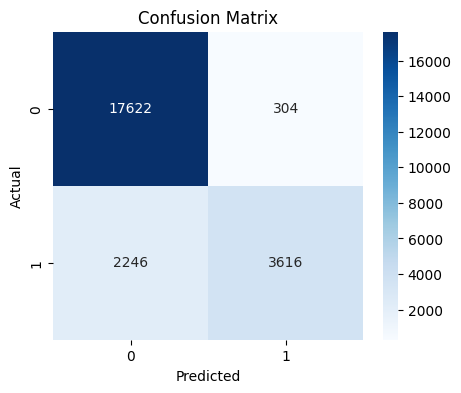

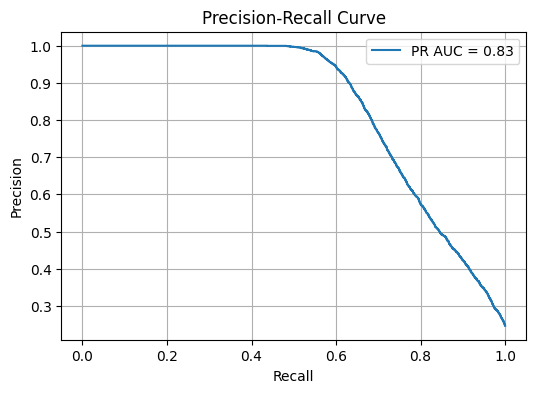

PR AUC Score: 0.8344


In [122]:
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)

model = lgb.LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    random_state=42,
    n_estimators=200,
    learning_rate=0.1
)

# التدريب
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_val_ready)
y_scores = model.predict_proba(X_val_ready)[:, 1]

# التقييم
print("Baseline LightGBM Metrics:")
print(f"Accuracy:  {accuracy_score(y_val, y_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_pred):.4f}")
print(f"Recall:    {recall_score(y_val, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_val, y_pred):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_val, y_scores):.4f}")

plot_confusion_matrix_and_pr_auc(y_val, y_pred, y_scores)


In [126]:
import lightgbm as lgb
import optuna
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score

feature_names_after_transform = get_feature_names(preprocessor)
X_train_ready_df = pd.DataFrame(X_train_ready, columns=feature_names_after_transform)


# كائن StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# دالة الهدف لـ Optuna
def objective(trial):
    params = {
        "objective": "binary",
        "metric": "binary_logloss",
        "boosting_type": "gbdt",
        "verbosity": -1,
        "random_state": 42,
        "n_estimators": trial.suggest_int("n_estimators", 100, 300),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 15, 100),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 50),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 1.0),
    }

    f1_scores = []

    for train_idx, val_idx in skf.split(X_train_ready, y_train):
        # التقسيم
        X_tr, X_val = X_train_ready_df.iloc[train_idx], X_train_ready_df.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]


        # تطبيق SMOTE على بيانات التدريب
        smote = SMOTE(random_state=42)
        X_tr_res, y_tr_res = smote.fit_resample(X_tr, y_tr)

        # تدريب النموذج
        model = lgb.LGBMClassifier(**params)
        model.fit(X_tr_res, y_tr_res)

        # التنبؤ
        y_pred = model.predict(X_val)
        f1 = f1_score(y_val, y_pred)
        f1_scores.append(f1)

    return np.mean(f1_scores)

# بدء ضبط المعاملات
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

# عرض أفضل النتائج
print("أفضل معاملات:")
print(study.best_params)
print("أفضل F1:", study.best_value)


[I 2025-07-12 02:18:52,420] A new study created in memory with name: no-name-46c03ee4-b625-406f-ac19-f22d34556fc5
[I 2025-07-12 02:19:32,701] Trial 0 finished with value: 0.7461925424747772 and parameters: {'n_estimators': 176, 'learning_rate': 0.15435692641723955, 'num_leaves': 93, 'max_depth': 6, 'min_child_samples': 48, 'subsample': 0.6208860330833614, 'colsample_bytree': 0.903984494579587, 'reg_alpha': 0.9578534332774293, 'reg_lambda': 0.8752268603919657}. Best is trial 0 with value: 0.7461925424747772.
[I 2025-07-12 02:20:06,747] Trial 1 finished with value: 0.7453302234613511 and parameters: {'n_estimators': 206, 'learning_rate': 0.14265166974559698, 'num_leaves': 19, 'max_depth': 5, 'min_child_samples': 38, 'subsample': 0.9664517004100884, 'colsample_bytree': 0.6984240719023975, 'reg_alpha': 0.11722788099539672, 'reg_lambda': 0.7713889737839702}. Best is trial 0 with value: 0.7461925424747772.
[I 2025-07-12 02:20:35,246] Trial 2 finished with value: 0.7462609775420518 and parame

أفضل معاملات:
{'n_estimators': 281, 'learning_rate': 0.09935895550011196, 'num_leaves': 76, 'max_depth': 7, 'min_child_samples': 43, 'subsample': 0.7765247938658351, 'colsample_bytree': 0.7066007557138821, 'reg_alpha': 0.32076822314090064, 'reg_lambda': 0.6695294896407586}
أفضل F1: 0.7473118629440852


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Baseline LightGBM Metrics:
Accuracy:  0.8934
Precision: 0.9195
Recall:    0.6220
F1 Score:  0.7420
ROC AUC:   0.8921


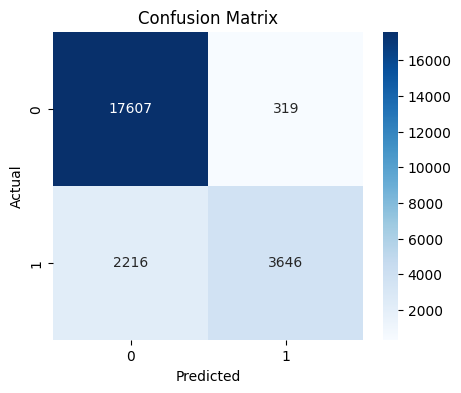

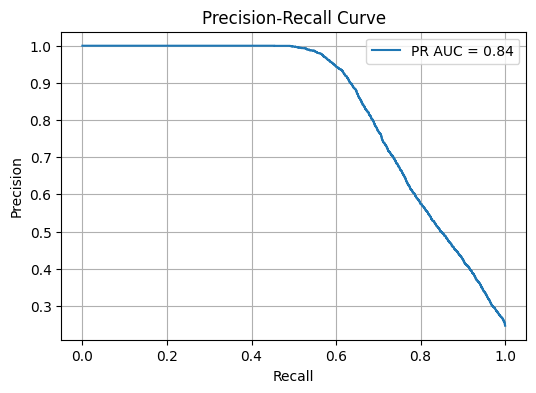

PR AUC Score: 0.8355


In [127]:
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)

model = lgb.LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    random_state=42,
    n_estimators=281,
    learning_rate=0.09935895550011196,
    num_leaves=76,
    max_depth =7,
    min_child_samples=43,
    subsample=0.7765247938658351,
    colsample_bytree=0.7066007557138821,
    reg_alpha=0.32076822314090064,
    reg_lambda=0.6695294896407586
)

# التدريب
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_val_ready)
y_scores = model.predict_proba(X_val_ready)[:, 1]

# التقييم
print("Baseline LightGBM Metrics:")
print(f"Accuracy:  {accuracy_score(y_val, y_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_pred):.4f}")
print(f"Recall:    {recall_score(y_val, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_val, y_pred):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_val, y_scores):.4f}")

plot_confusion_matrix_and_pr_auc(y_val, y_pred, y_scores)


##NN

In [152]:
def plot_learning_curves_keras(history):
    """رسم منحنيات الخسارة والدقة من كائن التاريخ history الخاص بـ Keras"""
    plt.figure(figsize=(12,5))

    # رسم الخسارة
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Over Epochs')
    plt.legend()

    # رسم الدقة (accuracy) إذا كانت موجودة
    if 'accuracy' in history.history:
        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Accuracy Over Epochs')
        plt.legend()

    plt.tight_layout()
    plt.show()


Epoch 1/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.6644 - loss: 0.6198 - val_accuracy: 0.8445 - val_loss: 0.3926
Epoch 2/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.7346 - loss: 0.4903 - val_accuracy: 0.8187 - val_loss: 0.4544
Epoch 3/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.7533 - loss: 0.4669 - val_accuracy: 0.8131 - val_loss: 0.4432
Epoch 4/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.7666 - loss: 0.4501 - val_accuracy: 0.8497 - val_loss: 0.3734
Epoch 5/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.7732 - loss: 0.4413 - val_accuracy: 0.8089 - val_loss: 0.4228
Epoch 6/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.7771 - loss: 0.4366 - val_accuracy: 0.8637 - val_loss: 0.3458
Epoch 7/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.7813 - loss: 0.4326 - val_accuracy: 0.8139 - val_loss: 0.4462
Epoch 8/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.7807 -

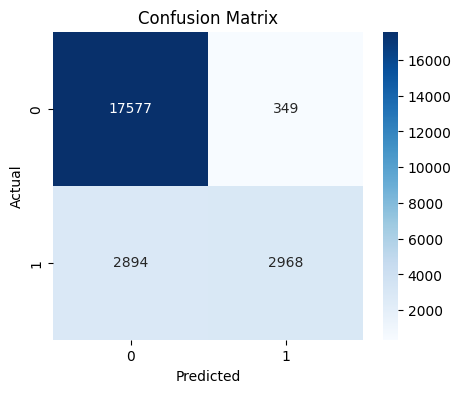

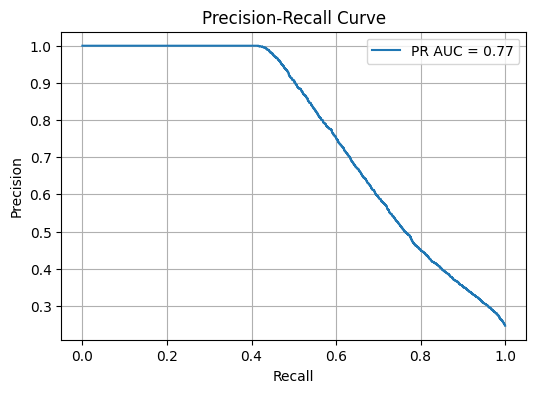

PR AUC Score: 0.7694
Classification Report:
              precision    recall  f1-score   support

           0     0.8586    0.9805    0.9155     17926
           1     0.8948    0.5063    0.6467      5862

    accuracy                         0.8637     23788
   macro avg     0.8767    0.7434    0.7811     23788
weighted avg     0.8675    0.8637    0.8493     23788

Precision: 0.8948
Recall: 0.5063
F1 Score: 0.6467


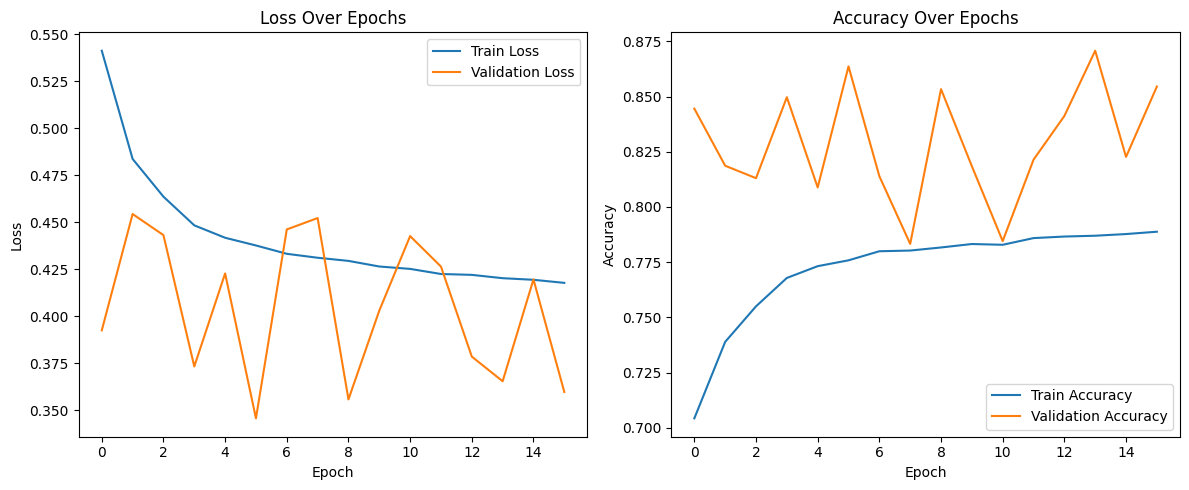

In [154]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)

# 2. بناء نموذج الشبكة العصبية
input_dim = X_train_resampled.shape[1]

model = Sequential([
    Dense(64, input_dim=input_dim, activation='relu'),
    # Dropout(0.3),
    Dense(32, activation='relu'),
    # Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # لأن التصنيف ثنائي
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 3. تدريب النموذج مع Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_resampled, y_train_resampled,
    validation_data=(X_val_ready, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# 4. التقييم

# التنبؤ بالاحتمالات على بيانات التحقق
y_val_scores = model.predict(X_val_ready).flatten()

# التنبؤ بالتصنيفات
y_val_pred = (y_val_scores >= 0.5).astype(int)

# استخدام الدوال اللي كتبتها
plot_confusion_matrix_and_pr_auc(y_val, y_val_pred, y_val_scores)
print_metrics(y_val, y_val_pred)
# بعد تدريب النموذج والحصول على history
plot_learning_curves_keras(history)


Epoch 1/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.6011 - loss: 1.5104 - val_accuracy: 0.7305 - val_loss: 0.5578 - learning_rate: 1.0000e-04
Epoch 2/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.7311 - loss: 0.5071 - val_accuracy: 0.7522 - val_loss: 0.5215 - learning_rate: 1.0000e-04
Epoch 3/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.7407 - loss: 0.4818 - val_accuracy: 0.8562 - val_loss: 0.3658 - learning_rate: 1.0000e-04
Epoch 4/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.7464 - loss: 0.4704 - val_accuracy: 0.8348 - val_loss: 0.4143 - learning_rate: 1.0000e-04
Epoch 5/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.7534 - loss: 0.4628 - val_accuracy: 0.8590 - val_loss: 0.3604 - learning_rate: 1.0000e-04
Epoch 6/100
4482/4482 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.7553 - loss: 0.4592 - val_accuracy: 0.8474 - val_loss: 0.3886 - learning_rate: 1.0000e-04
Epoch 7/100
4482/4482 ━━━━━━━━━━━━━━━━━━

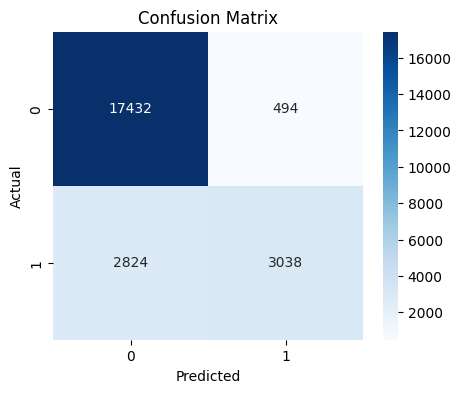

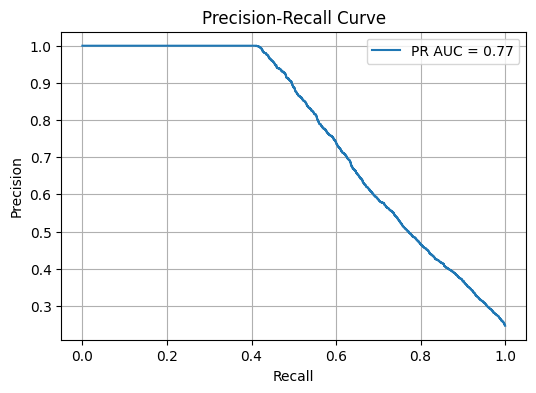

PR AUC Score: 0.7678
Classification Report:
              precision    recall  f1-score   support

           0     0.8606    0.9724    0.9131     17926
           1     0.8601    0.5183    0.6468      5862

    accuracy                         0.8605     23788
   macro avg     0.8604    0.7453    0.7799     23788
weighted avg     0.8605    0.8605    0.8475     23788

Precision: 0.8601
Recall: 0.5183
F1 Score: 0.6468


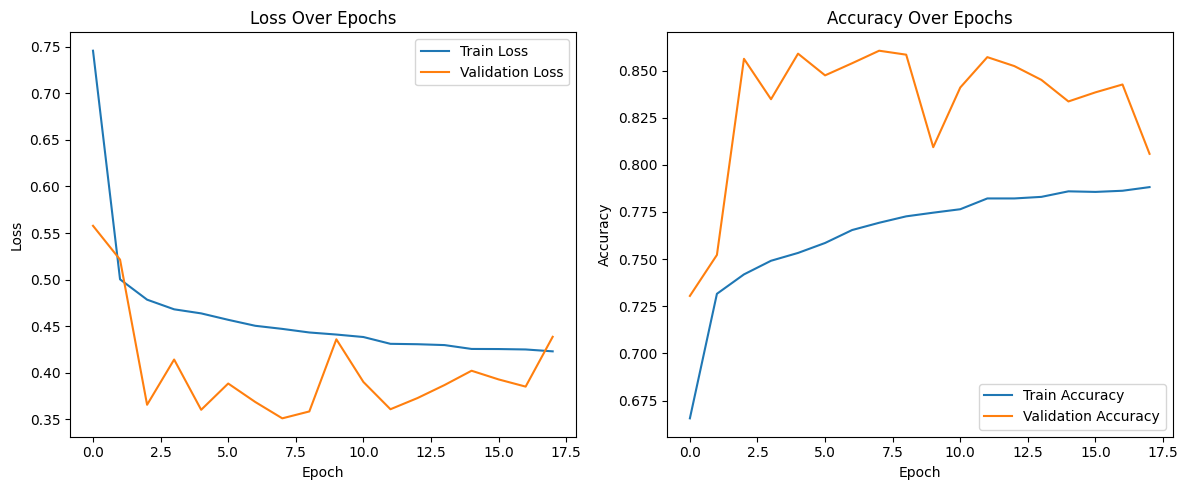

In [158]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_ready, y_train)

# 2. بناء نموذج الشبكة العصبية
input_dim = X_train_resampled.shape[1]

model = Sequential([
    Dense(64, input_dim=input_dim, activation='relu'),
    # Dropout(0.3),
    Dense(32, activation='relu'),
    # Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # لأن التصنيف ثنائي
])
optimizer = Adam(learning_rate=0.0001)  # قللها من 0.001 إلى 0.0001 مثلاً

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 3. تدريب النموذج مع Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6
)

history = model.fit(
    X_train_resampled, y_train_resampled,
    validation_data=(X_val_ready, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# 4. التقييم

# التنبؤ بالاحتمالات على بيانات التحقق
y_val_scores = model.predict(X_val_ready).flatten()

# التنبؤ بالتصنيفات
y_val_pred = (y_val_scores >= 0.5).astype(int)

# استخدام الدوال اللي كتبتها
plot_confusion_matrix_and_pr_auc(y_val, y_val_pred, y_val_scores)
print_metrics(y_val, y_val_pred)
# بعد تدريب النموذج والحصول على history
plot_learning_curves_keras(history)


#f
<div dir="rtl">
بالطبع، إليك شرحًا لكل متغير (عمود) في هذا الجدول من قاعدة البيانات، بناءً على أسمائه والمجال المحتمل (قروض أو تمويل عقاري). إذا كنت تعمل على تحليل أو نمذجة بيانات، فهذا سيساعدك على فهم المتغيرات بشكل أفضل:

* * *

### 💡 **المتغيرات الأساسية**

| العمود                       | الشرح                                                                           |
| ---------------------------- | ------------------------------------------------------------------------------- |
| **ID**                       | رقم تعريفي فريد لكل صف أو طلب.                                                  |
| **year**                     | سنة تقديم طلب القرض.                                                            |
| **loan\_limit**              | الحد الأعلى للقرض (قد يشير إلى نوع الحد، مثل "Conforming" أو "Non-conforming"). |
| **Gender**                   | جنس المتقدم (ذكر / أنثى / غير محدد).                                            |
| **approv\_in\_adv**          | هل تمت الموافقة على القرض بشكل مسبق؟                                            |
| **loan\_type**               | نوع القرض (على سبيل المثال: قرض عقاري، قرض شخصي...).                            |
| **loan\_purpose**            | الغرض من القرض (شراء منزل، تجديد، تعليم...).                                    |
| **Credit\_Worthiness**       | الجدارة الائتمانية للمقترض (جيد، ضعيف، إلخ).                                    |
| **open\_credit**              | ما إذا كان لدى العميل أرصدة ائتمانية مفتوحة.                                    |
| **business\_or\_commercial** | هل الغرض من القرض تجاري أو شخصي؟                                                |

* * *

### 💰 **تفاصيل القرض والتمويل**

| العمود                     | الشرح                                                              |
| -------------------------- | ------------------------------------------------------------------ |
| **loan\_amount**           | مبلغ القرض المطلوب.                                                |
| **rate\_of\_interest**     | معدل الفائدة المفروض على القرض.                                    |
| **Interest\_rate\_spread** | الفرق بين الفائدة المعروضة والمتوسطة في السوق (قد تدل على مخاطرة). |
| **Upfront\_charges**       | رسوم تدفع مقدماً مقابل القرض (رسوم فتح ملف، إلخ).                  |
| **term**                   | مدة القرض (بالسنوات أو الأشهر).                                    |

* * *

### 🏠 **تفاصيل العقار**

| العمود                 | الشرح                                           |
| ---------------------- | ----------------------------------------------- |
| **property\_value**    | قيمة العقار الممول.                             |
| **construction\_type** | نوع البناء (جديد، قائم...).                     |
| **occupancy\_type**    | نوع السكن (رئيسي، ثانوي، مؤجر...).              |
| **Secured\_by**        | ما إذا كان القرض مضمونًا بعقار أو شيء آخر.      |
| **total\_units**       | عدد الوحدات السكنية (1، 2، 3... منازل، شقق...). |

* * *

### 💳 **الائتمان والدخل**

| العمود                         | الشرح                                                               |
| ------------------------------ | ------------------------------------------------------------------- |
| **income**                     | دخل المقترض السنوي.                                                 |
| **credit\_type**               | نوع الائتمان المستخدم (تقارير ائتمانية مثل Equifax أو Experian...). |
| **Credit\_Score**              | درجة الائتمان (عادة بين 300 و850).                                  |
| **co-applicant\_credit\_type** | نوع الائتمان الخاص بالمتقدم المشترك، إن وجد.                        |

* * *

### 🔁 **شروط السداد**

| العمود                 | الشرح                                                          |
| ---------------------- | -------------------------------------------------------------- |
| **Neg\_ammortization** | هل يحتوي القرض على تسديد سلبي (تتراكم الفائدة بدلاً من دفعها). |
| **interest\_only**     | هل القرض فائدة فقط لفترة معينة؟                                |
| **lump\_sum\_payment** | هل يمكن تسديد مبلغ دفعة واحدة؟                                 |

* * *

### 👤 **بيانات المتقدم**

| العمود                          | الشرح                                        |
| ------------------------------- | -------------------------------------------- |
| **age**                         | عمر المتقدم (قد يكون في فئات عمرية أو رموز). |
| **submission\_of\_application** | هل تم تقديم الطلب إلكترونيًا أم يدويًا؟      |
| **Region**                      | المنطقة الجغرافية للطلب.                     |
| **Security\_Type**              | نوع الضمان المرتبط بالقرض.                   |

* * *

### 📈 **مؤشرات مالية أخرى**

| العمود     | الشرح                                                                    |
| ---------- | ------------------------------------------------------------------------ |
| **LTV**    | **Loan-To-Value** نسبة القرض إلى قيمة العقار (كلما زادت، زادت المخاطرة). |
| **Status** | حالة القرض (مقبول، مرفوض، قيد المراجعة... يحددها الرقم).                 |
| **dtir1**  | **Debt-To-Income Ratio** النسبة بين الدين والدخل؛ مؤشر على قدرة السداد.  |

* * *

إذا أردت ترجمة أو توضيح أي متغير بمصطلحات مالية عربية دقيقة، أو تحليل القيم الناقصة أو المتغيرات النوعية، فأخبرني وسأساعدك بالتفصيل.
</div>